## Machine Learning for the 20th century: <br> Can a United Kingdom database from 1987 classify a glass cosmetics jar that might have belonged to Amelia Earhart?
Author: Joe Cerniglia <br><br>
Reviewers: <br> Jennifer Ding<br>Research Application Manager<br> 
The Alan Turing Institute<br><br>Eirini Zormpa<br>Community Manager of Open Collaboration<br>The Alan Turing Institute<br><br>
Date: March 18, 2022 <br><br>

## Background
In the summer of 2010, researchers from The International Group for Historic Aircraft Recovery excavated, in fragments, a small semi-opaque cosmetic jar from the Pacific island of Nikumaroro. They were searching for evidence to support their hypothesis that Amelia Earhart and her navigator Fred Noonan perished there in 1937, after very nearly succeeding in their pathbreaking mission to circumnavigate the globe by air at its widest point, the equator.

My interest in glass artifacts from the island ultimately led to a personal quest to become a resident glass expert of the team. In partnership with archaeologists Thomas King and Bill Lockhart, and chemist Greg George, we produced a [paper](https://www.academia.edu/40823470/A_Freckle_In_Time_or_a_Fly_in_the_Ointment) that summarized our findings. By then, our work on the jar had already generated some [press](https://www.nbcnews.com/id/wbna47623025).

As we continued our research in 2013, Greg George and I worked with EAG Laboratories to determine the chemical composition of the Nikumaroro jar and a sibling glass jar, used as a control, that I had purchased on eBay and had named the clear facsimile. While the two jars were similar in most respects, interestingly, the clear facsimile jar was transparent, while the Nikumaroro jar was semi-opaque. Both jars were manufactured by the Hazel-Atlas Glass Company of Wheeling, West Virginia, but EAG Laboratories' [ICP-MS analysis](https://tighar.org/Projects/Earhart/Archives/Research/ResearchPapers/freckleintime/Document_02_Facsimileclearjarreport.pdf) revealed them to have considerably different chemical profiles.


## Data 
In the social sciences, "data" often mean a collection of facts. In industry, however, we often consider data to be a collection of numbers and vectors, and we use computational tools such as statistics and machine learning to aid in their analysis. As part of an eCornell machine learning course, in 2022 I had the opportunity to revisit my work on the Nikumaroro jar as a learning exercise, and to use the data returned by EAG Laboratories to attempt to solve a novel machine learning classification problem I had proposed.

Thus was my interest in analyzing the Nikumaroro jar and comparing it with its sibling rekindled. Instead of using the jars' data as a collection of facts, I now wanted to use them to study machine learning classification. 

By analyzing the weight percent of the chemical elements of which each jar's glass was made, plus refractive index, machine learning can build a model that will predict a pre-defined class to which it believes a given glass sample belongs. We may then assess the skill of the model by comparing all predictions to the actual correct classes for each sample. The correct class of the Nikumaroro jar and of the clear facsimile is that of a **container.**

Two sets of measurements for the purposes of machine learning are not of much value, however, because machine learning models require a full range of known examples upon which to 'train' a model to recognize examples it has never seen before. 

EAG Laboratories had been thorough, and for the purposes of our 2013 analysis, their data was ample enough. For the purposes of machine learning, however, the data, while eagerly anticipated by our team, was paltry. Where would I find the data upon which to train a machine learning model? I did not need to search very far for my answer. British forensic scientists ``Ian W. Evett`` and ``Ernest J. Spiehler`` assembled a database of glass samples in 1987 for the purposes of solving crimes, such as break-ins. Their paper was first presented at the 1987 conference of the KBS (Knowledge-Based Systems) in Goverment and is titled: <br><br>"Rule Induction in Forensic Science." http://gpbib.cs.ucl.ac.uk/gp-html/evett_1987_rifs.html. <br><br>Their database is available at the University of California Machine Learning Repository [here](http://archive.ics.uci.edu/ml/datasets/Glass+Identification).

The weight percent of eight chemical elements and refractive index comprise the features of their database and each sample is represented by a target variable called Type. The types of glass represented in the sample are: Window Float, Window Non-Float, Vehicle Float, Container, Tableware, and Headlamp. There are no Vehicle Non-Float types represented in the data.

My two glass samples, as luck would have it, were independently measured for most of the same elements as found in the U.K. database, with a few caveats:

* Because silicon was measured in my lab data as 'Matrix,' with no actual number stated, I estimated the silicon for both containers based on the average for containers in the database (72.37). 
* Because K (potassium) was measured at 980 ppm for the clear facsimile, rather than by wt%, I assigned it a value of 50% of the wt% of the Nikumaroro jar: .5 X .24 = .12. 
* Because Fe (iron) is at very low wt% levels in the 1987 database, and the levels in my data are listed at very low parts per million (ppm), I assigned to the Nikumaroro jar and to the clear facsimile a wt% of Fe of .02 and .01, respectively.
* Refractive index was not measured for either the Nikumaroro jar or the clear facsimile. Since the clear facsimile is completely transparent, I assigned it the minimum refractive index of containers from the 1987 dataset. Since the Nikumaroro jar is semi-opaque, I assigned it the maximum refractive index of containers from the 1987 dataset. 

These educated guessed were necessary to ensure the ability of the machine learning algorithm to compare the data from EAG Laboratories with the training dataset from the U.K.*

#### *Note: In a later section of this story, we will use a technique to evaluate whether or not the decision to supply  a few of the values for the jars makes a significant difference in our machine learning algorithm's ability to predict the class of the two jar samples.


## Research Agenda
There are three main research questions I wish to answer in my machine learning classification problem. I follow each of these questions with a rationale that explains the derived benefits in answering each question.<br><br>
**1) What can Python's Matplotlib and Seaborn graphing capabilities reveal about the similarities and/or dissimilarities between the Nikumaroro jar, clear facsimile, and the glass samples in the 1987 database?**

Rationale: Before tackling the machine learning problem, we need to learn whether and how the Nikumaroro jar and the clear facsimile, which precede the samples in the U.K. database by many decades, differ from the samples in that U.K. database. If the difference is too great, it may not be possible to use machine learning to classify the Nikumaroro jar and the clear facsimile at all.

<br>**2) What do the correlations between elements for the different types of glass in the 1987 database reveal about late 20th century glassmaking, as compared with early 20th century glassmaking?**

Rationale: The Nikumaroro jar and the clear facsimile precede the samples in the U.K. database by many decades. During these many decades, the recipes used in the glassmaking batches may have changed considerably. It is always fascinating to observe historical changes made manifest in data, but beyond this historical interest, the graphs that may be built from these correlations may also provide visual explanations for some difficulties a machine learning model may be having with classifying the Nikumaroro jar and the clear facsimile.

<br>**3) Using machine learning to train a model on the 1987 database, could that model be used to classify the type (container) of one or both of the older samples unseen by the model?**

Rationale: A successful classification of the Nikumaroro jar may suggest that it is not quite so unusual as we had supposed in our earlier research. The U.K. database was never built to classify highly unusual or historical glass samples. It was built to classify ordinary glass samples retrieved from break-ins that occurred in the 1980s. Successful classification would strengthen the argument, often expressed but without evidence, that the jar is not a rare item likely to be from the 1930s, but of far more recent provenance, too recent to have possibly been brought to the island in 1937 by Amelia Earhart. 

The outcome of this classification problem has the potential to disverify or perhaps weaken a part of our [hypothesis](https://www.academia.edu/9015080/Amelia_Earhart_on_Nikumaroro_A_Summary_of_the_Evidence) that Earhart and her navigator, Fred Noonan, perished on Nikumaroro. Efforts to disverify are an important element of scientific research, for as [Richard Feynman once said](https://faculty.mtsac.edu/cbriggs/Biol-1%20Readings%20Cargo%20Cult%20Science.pdf), "The first principle is that you must not fool yourself — and you are the easiest person to fool." 


### First, before we start to analyze these questions, we will read in the data file and create a simple report.

Our first task is to read in a copy of the 1987 glass.data file that has been uploaded to Zenodo.org. Then, we can assign the names of the variables in this file to a variable called names. Notice I am carefully avoiding the variable name 'Type' because it is a reserved word in Python. (This was obviously not true in 1987 when the database was built, because Python did not exist then.) Using that reserved word will co-opt the type function, thus disabling my ability to check the types of specific variables. Instead, I will use the variable name 'GlassType' to contain the various types of glass.

I also include a docstring explaining what these variables mean and their general significance to glassmaking.

In [2]:
"""
ID: an integer that identifies the 1987 sample number. This column should always be droppped in any analysis.
Ref_ix: Refractive index. There are many scientific definitions of refractive index, but in basic terms,
refractive index refers to how much the path of light is refracted when it enters the glass. The higher the 
refractive index, the less transparent the glass is.
Na: Sodium oxide reduces the temperature at which silica melts to around 1500-1650 Celsius. A lower temperature
equates to a more efficient and less costly manufacturing process.
Mg: Magnesium oxide is used as a reducing agent in glassmaking. It reduces sulfates, which are used to fine the
glass, and other impurities, such as iron.
Al: Aluminum oxide is added to increase durability and heat resistance and to reduce crystallization.
Si: Silicon oxide. The main constituent (matrix) of glass is silica sand.
K: Potassium oxide is used for strengthening and fining the glass.
Ca: Calcium oxide is considered a stabilizer. It is used for increasing the chemical durability of glass, and 
also to lower the melting point of the silica. Calcium oxide can also be used to raise refractive index.
Ba: Barium oxide. Barium was, and is, employed in glass manufacture to add luster or brilliance to glass, 
and also to raise the refractive index.[1] Museum glass, salt shakers, shot glasses, and microscopic slides 
are often high in barium. The Nikumaroro jar is also high in barium.
Fe: Iron oxide can be used as a colorant or it can exist by chance as an impurity.
GlassType: This is the integer assigned in 1987 to signify the type of glass of the sample. This column should
only appear in the validation dataset; it should be dropped from the training dataset.
"""
import urllib.request
with urllib.request.urlopen("https://zenodo.org/record/6913745/files/glass.data") as f:
    html=f.read().decode('utf-8')
    with open('glass.csv', 'w') as out:
        out.write(html)

filename='glass.csv'

names=['ID','Ref_ix','Na','Mg','Al','Si','K','Ca','Ba','Fe','GlassType']



The three questions of the research agenda (listed above) are quite different. It will be convenient to modify the dataset in different ways for each problem. Therefore, we will read in the file twice to create two Pandas dataframes of the glass data, thus allowing us to have separate data pipelines to keep the machine learning question separate from the other two. The pandas library in Python provides a convenient function, read_csv, for this purpose. One of the columns is imported as an object, which I will coax to be an integer for more reliable data processing.

In [3]:
from pandas import read_csv
dataset = read_csv(filename, header=None, sep=',',names=names)
dataset_ml = read_csv(
    filename, header=None, sep=',',names=names)
# Convert clunky object formats to ints
dataset['GlassType'] = dataset['GlassType'].astype('string')
dataset['GlassType'] = dataset['GlassType'].astype('int')
dataset_ml['GlassType'] = dataset['GlassType'].astype('string')
dataset_ml['GlassType'] = dataset['GlassType'].astype('int')

Next, we will provide the list of variables in the file with descriptions of their counts and data types. I could use the info() method for this purpose, but an anonymous user on [StackOverflow](https://stackoverflow.com/questions/64067424/how-to-convert-df-info-into-data-frame-df-info) has provided a function, which I have adopted, to give this information a more attractive display. It would be useful as well to have a simple statistical report of this dataset, which is provided by the describe method. Notice that the columns ID and GlassType, as supplied from the 1987 study, are integers, but they are also categorical variables. I will therefore drop these columns from my simple statistical report because they would be meaningless in terms of the measures of central tendency (mean, max, etc.). However, because GlassType will be<b> very </b>important to the rest of this code, I will take a copy of the dataset prior to making this report, to ensure I do not drop this variable from the original Pandas dataframe.

In [4]:
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo
display(infoOut(dataset))
temp=dataset.copy()
display(temp.iloc[:,1:-1].describe())


,Column,Non-Null Count,Dtype
0,ID,214,int64
1,Ref_ix,214,float64
2,Na,214,float64
3,Mg,214,float64
4,Al,214,float64
5,Si,214,float64
6,K,214,float64
7,Ca,214,float64
8,Ba,214,float64
9,Fe,214,float64


,Ref_ix,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


There are no nulls in the dataset. The column types are all numeric. All 214 samples of the database have been included.

### Create a dictionary of glass types.
We need a way to translate the numerical glass types found in the 1987 database to their English equivalents. This is accomplished by creating a Python dictionary.

Note we could have omitted Vehicle Non-Float from this dictionary, since there are no examples in the data of this type; however, for the sake of clarity we will retain it.

We include also an exhibit that lists the counts for the various glass types.

In [5]:
 dict = {1: 'Window Float',
  2: 'Window Non-Float',
  3: 'Vehicle Float',
  4: 'Vehicle Non-Float',
  5: 'Container',
  6: 'Tableware',
  7: 'Headlamp'}

vc=temp.replace({"GlassType": dict},inplace=True)
vc=temp['GlassType'].value_counts().rename_axis('unique_values').reset_index(name='Counts')
vc.set_index('unique_values',inplace=True)
vc.rename_axis(['GlassType'],inplace=True)
display(vc)

,Counts
GlassType,
Window Non-Float,76
Window Float,70
Headlamp,29
Vehicle Float,17
Container,13
Tableware,9


### What do the types of glass represent in everyday life?
The terms "float" and "non-float" are glass industry terms. They describe the process by which window glass is made. Prior to 1959, all windows were made with non-float processes. These commonly involved grinding and polishing sheets of plate glass, which were cast on an iron surface. The result was not the perfectly smooth and clear glass we know today but rather was somewhat more translucent and sometimes ['wavy'](https://brennancorp.com/blog/why-is-the-glass-in-my-windows-wavy/). Today, this kind of window glass is prized for its artistic appearance and historical significance, if not for its lack of clarity. Float glass is made by floating molten glass on a bed of molten tin under controlled environmental conditions in a bath chamber. An excellent video describing this process is [here:](https://www.youtube.com/watch?v=pMKHs_FF0bw&t=200s)

If a glass sample is Window Float, in all probability it was manufactured no earlier than 1959. Window Non-Float samples are probably older than 1959. 

Vehicle Float glass describes the type of glass that has been used for vehicle windshields since 1959.

Headlamps are vehicle lamps, which illuminate the road ahead.

Container glass describes commercial product containers, whether for bottles or jars.

Tableware glass describes glassware for the table or any glass table item used in dining or the serving of food.

### Create some utility functions for plotting graphs from the 1987 dataset.

Before using machine learning on the data, there is much we can learn about the two jars' likeness to glass samples in the 1987 database, simply by observing counts based on specific criteria. By comparing each jar with its "nearest neighbors," based on measurements for three elements in the periodic table, we may gain a sense of which type of glass in the database each jar most closely resembles. 

We will therefore write functions to create three graphical reports, one for each of the three elements magnesium, calcium, and barium. Each of the three reports will display three things:<br>
1) The complete range of counts for each glass type. (This graph will be repeated for each report.) <br>
2) The range of counts for all glass types within 0.15 above and below the elemental measurement of the <b>clear facsimile</b>. <br>
3) The range of counts for all glass types within 0.15 above and below the elemental measurement of the <b>Nikumaroro jar</b>.

The key function, numgroups, requires an element from the periodic table so that it can look up parameters in the included dictionary. This dictionary contains the measurements obtained from the lab for each element for the clear facsimile and for the Nikumaroro jar. Low and High parameter values for each element are also required, even when the complete range of counts is to be displayed. These will be passed to the function as hard-coded values that are either <br>
> a. exactly 0.15 above and below the measurement for each jar; or <br>
> b. the lowest and highest measured values in the database for each element.

Last, the jar_spec parameter is simply the type of jar to be analyzed, clear facsimile or Nikumaroro jar. The jar_spec is used to create the title for each graph.

If the graph's input parameters result in a graph with a single type of glass, no graph is created. (Bar graphs with but a single bar are, after all, neither very attractive nor useful!) Instead, a message is displayed that mirrors the text that accompanies the other graphs.

If the number of glass types returned by the criteria is equal to zero, we cause an error to be thrown with int('d'), which attempts to convert the letter 'd' to an integer, rather than waiting for the error that would have been thrown naturally by the plot statement. If we had waited for the plot statement to throw the error, useless information about the size of the graph (which cannot be drawn in this case) is displayed. In the case of this error, a simple message is printed to inform us that no relevant glass samples were found in the database.

The other function, ticks_restrict_to_integer, is a utility function that controls the number of tick marks on the y-axis of each graph. The y-axis represents the count. Because the scale of counts varies with each graph, it was necessary to make the y-axes more uniform with one another by having this function.

In [6]:
from matplotlib.ticker import MultipleLocator
def ticks_restrict_to_integer(axis):
    """Restrict the ticks on the given axis to be at least integer;
    that is, no half ticks at 1.5 for example.
    """
    major_tick_locs = axis.get_majorticklocs()
    if len(major_tick_locs) < 2 or major_tick_locs[1] - major_tick_locs[0] < 1:
        axis.set_major_locator(MultipleLocator(1))    

def numgroups(element,low,high,jar_spec):
    """
    non-fruitful function. Outputs a graph if the number of types of
    glass within the DataFrame is > 1.  Otherwise, the function prints
    a message, for aesthetic reasons.

    parameters:
    element: an element in the periodic table
    low: A minimum value for the measured element, which acts as the 
    minimum value to allow into the dataset sample
    high: A maximum value for the measured element, which acts as the 
    maximum value to allow into the dataset sample
    jar_spec: A value of either 'clear facsimile' or 'Nikumaroro jar', used
    in the title of the graph. 
    
    However, when the function is called to obtain the complete distri-
    bution of counts, the value of jar_spec is set equal to None. 
    
    Preconditions:
    element is a string with value of: 'Mg' or 'Ca' or 'Ba'
    
    Low cannnot be greater than high.
    """
    jar_spec='full range of ' + element + ' measurements in the database' if jar_spec==None else jar_spec
    rangedict = {'Ba':['Barium',[.37,.74]],
                 'Mg':['Magnesium',[2.4,4.3]],
                 'Ca':['Calcium',[3.6,8.5]]}
    facsimile_ref=rangedict[element][1][0]
    artifact_ref=rangedict[element][1][1]
    element_full_name=rangedict[element][0]
    sampl = dataset[(dataset[element] >= low) & (
        dataset[element] <= high)]
    number_groups=sampl['GlassType'].value_counts().shape[0]
    titletext1="Count of Glass Types in the 1987 database \n with a range of measured values of " + \
    element_full_name + " \n between " + str(low) + " and " + str(high) + " wt%. \n " + \
    "This is the range of counts for the " + jar_spec.upper()

    if 'clear' in jar_spec or 'Niku' in jar_spec:
        #Tolerance provides information in the report about the range of values considered in the graph.
        tolerance=round((high-low)/2,2)
        titletext2=" that fall within a tolerance of +-" + str(tolerance) + ' of its measurement.'
    else:
        tolerance=0
        titletext2="."
        
    if low>high:
        print('Low value must be smaller than the high value. Try again.')
        return
    
    if number_groups==1:
        print(titletext1 + titletext2)
        print('There is only ONE sample Type.')
        print(sampl['GlassType'].values[0],'=',sampl.shape[0])
        print('reference: Clear facsimile jar =',facsimile_ref,'wt%'
              '\n Nikumaroro jar =',artifact_ref,'wt%')
    else:
        print('reference: Clear facsimile jar =',facsimile_ref,'wt%'
              '\n Nikumaroro jar =',artifact_ref,'wt%')
        try:
            vc=sampl['GlassType'].value_counts()
            int('d') if len(vc)==0 else int('1')
            
            vc.plot(
                kind='bar', figsize=(2.3*number_groups, 6), rot=0, cmap='Spectral');
            plt.xlabel("Glass Type", labelpad=14,fontsize=16,rotation=0)
            plt.ylabel("Count of Type", labelpad=70, 
                       fontsize=16,rotation=0)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.figtext(0.5, 1.0, titletext1+titletext2, wrap=True, horizontalalignment='center', fontsize=16)  
            ax = plt.subplot()
            ticks_restrict_to_integer(ax.yaxis)
            plt.show()
        except Exception as e: 
            #print(e)
            print('For the ' + jar_spec + ', no glass samples in the U.K. data are in the range of ' + str(low) +
                " and " + str(high) + ' wt% for ' + element_full_name + '.')
            print()
    return

### What types of glass in the 1987 database are most similar to the Nikumaroro jar and clear facsimile in terms of magnesium, barium or calcium content?
To review what was stated above, examining Mg, Ba, and Ca individually in the U.K. database, we can perform the following steps to produce a report: 
1. Obtain the complete distribution of counts in the 1987 database by restricting the element's values to the range between its minimum and maximum wt% values. 
2. See the distribution of counts in the 1987 database that results from setting the range of measured wt% for the element to a tolerance 0.15 wt% above and below its measurement for the ```clear facsimile```. 
3. See the distribution of counts in the 1987 database that results from setting the range of measured wt% for the element to a tolerance 0.15 wt% above and below its measurement for the ```Nikumaroro jar```.
4. Repeat steps 1 to 3 for the next element until all elements have been reported.

## Report for Magnesium

reference: Clear facsimile jar = 2.4 wt%
 Nikumaroro jar = 4.3 wt%


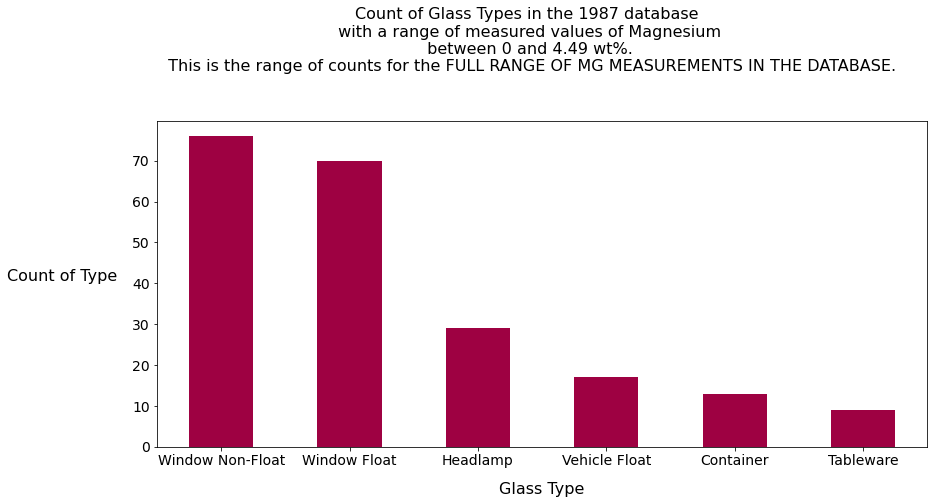

reference: Clear facsimile jar = 2.4 wt%
 Nikumaroro jar = 4.3 wt%


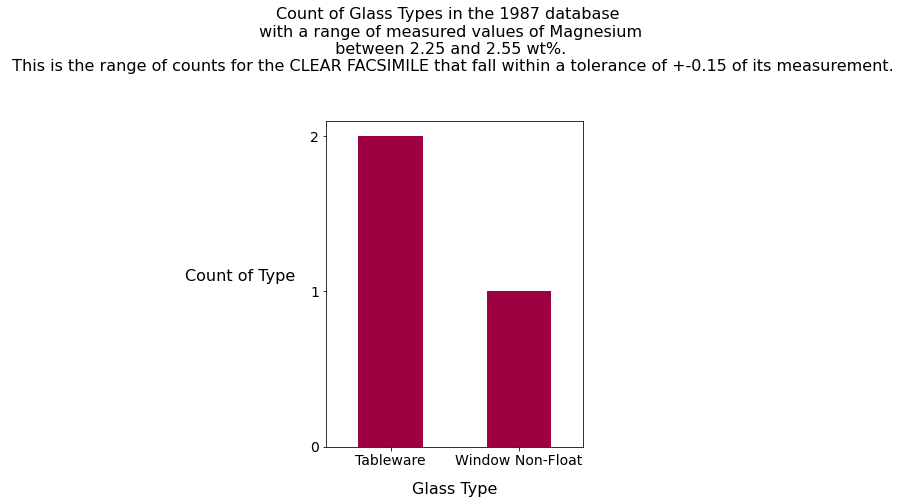

reference: Clear facsimile jar = 2.4 wt%
 Nikumaroro jar = 4.3 wt%
For the Nikumaroro jar, no glass samples in the U.K. data are in the range of 4.15 and 4.45 wt% for Magnesium.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random

dataset.replace({"GlassType": dict},inplace=True)
element='Mg'
Mgdict={'clear facsimile':[2.25, 2.55],'Nikumaroro jar':[4.15,4.45]}
low=0
high=dataset[element].max()

#Run report for all glass types
numgroups(element,low,high,None)

#Run reports for the clear facsimile and Nikumaroro jar
for jar_type in Mgdict:
    low=Mgdict[jar_type][0]
    high=Mgdict[jar_type][1]
    numgroups(element,low,high,jar_type)

### Magnesium Analysis
Magnesium:<br>
The clear facsimile jar has 2.4 wt% Mg. There are only two glass types, tableware and non-float windows, with values between 2.25 and 2.55 wt% Mg. Magnesium, if it were the only feature, would seem to predict the clear facsimile jar to be in the window or the tableware family, a close cousin to the container family. <br>The Nikumaroro jar has 4.3 wt% Mg. Checking back to the report we created with the describe() method, this value is well above the 75th percentile. We know from the literature on glassmaking that any Mg measurement from a modern glass sample that is above 3.5 wt% is likely to be a window, and not a container.[2]

## Report for Calcium

reference: Clear facsimile jar = 3.6 wt%
 Nikumaroro jar = 8.5 wt%


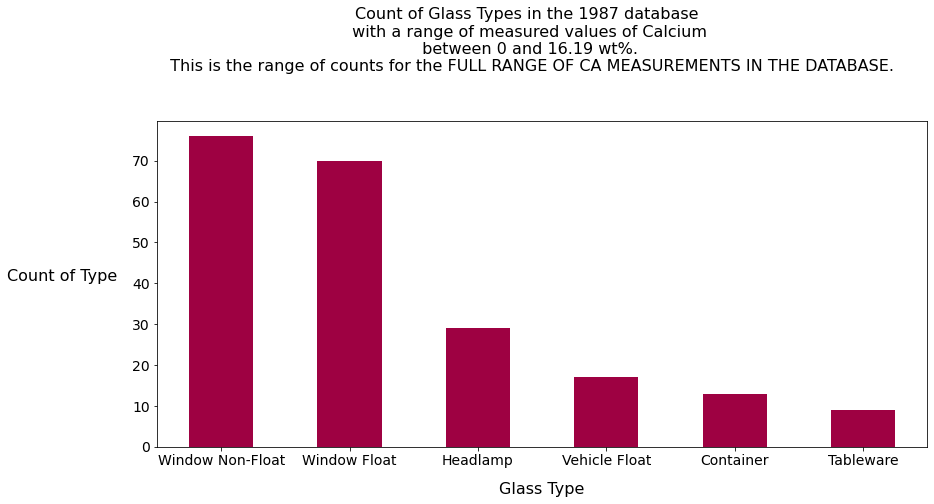

reference: Clear facsimile jar = 3.6 wt%
 Nikumaroro jar = 8.5 wt%
For the clear facsimile, no glass samples in the U.K. data are in the range of 3.45 and 3.75 wt% for Calcium.

reference: Clear facsimile jar = 3.6 wt%
 Nikumaroro jar = 8.5 wt%


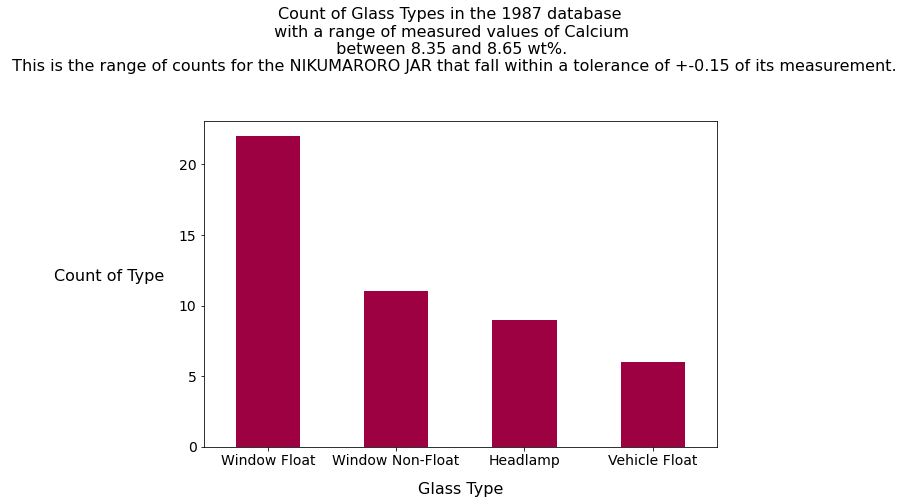

In [8]:
dataset.replace({"GlassType": dict},inplace=True)
element='Ca'
Cadict={'clear facsimile':[3.45, 3.75],'Nikumaroro jar':[8.35,8.65]}
low=0
high=dataset[element].max()

#Run report for all glass types
numgroups(element,low,high,None)

#Run reports for the clear facsimile and Nikumaroro jar
for jar_type in Cadict:
    low=Cadict[jar_type][0]
    high=Cadict[jar_type][1]
    numgroups(element,low,high,jar_type)

### Calcium Analysis

Calcium:<br>
The clear facsimile jar has 3.6 wt% Ca. We can see from the report we created with the describe() method that this is off-scale low, a value less than all the samples in the database. No glass samples are in the range of 3.45% and 3.75% weight calcium. <br>The Nikumaroro jar has 8.5 wt% Ca. This is close to the mean in the database (8.96) for all glass types, but no containers are displayed on the graph within +- .15 of the calcium value measured on the Nikumaroro jar.

## Report for Barium

reference: Clear facsimile jar = 0.37 wt%
 Nikumaroro jar = 0.74 wt%


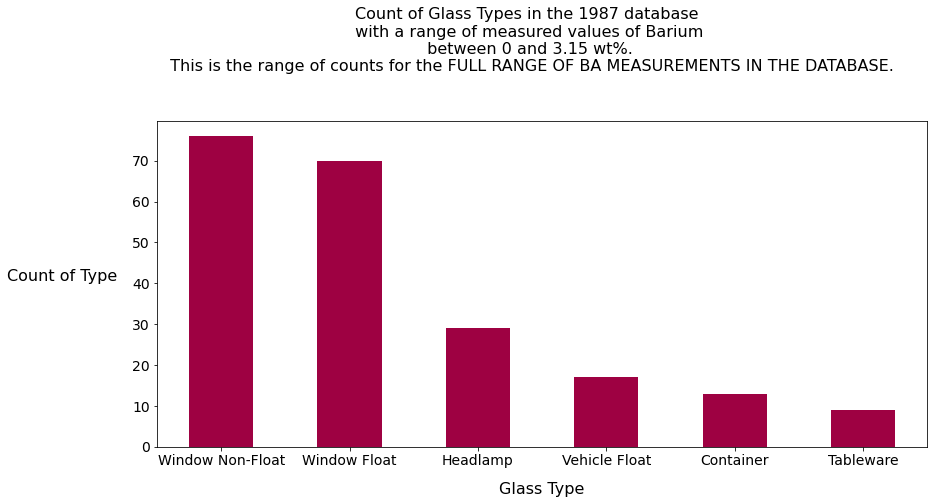

reference: Clear facsimile jar = 0.37 wt%
 Nikumaroro jar = 0.74 wt%


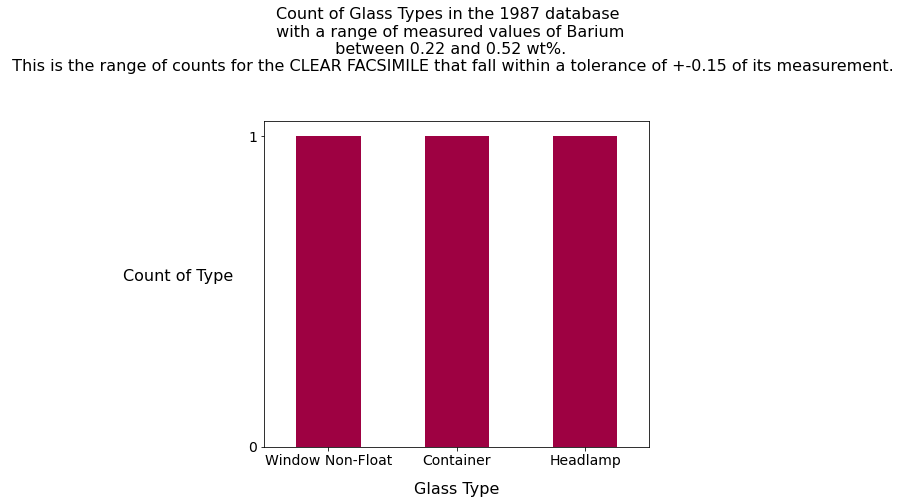

reference: Clear facsimile jar = 0.37 wt%
 Nikumaroro jar = 0.74 wt%


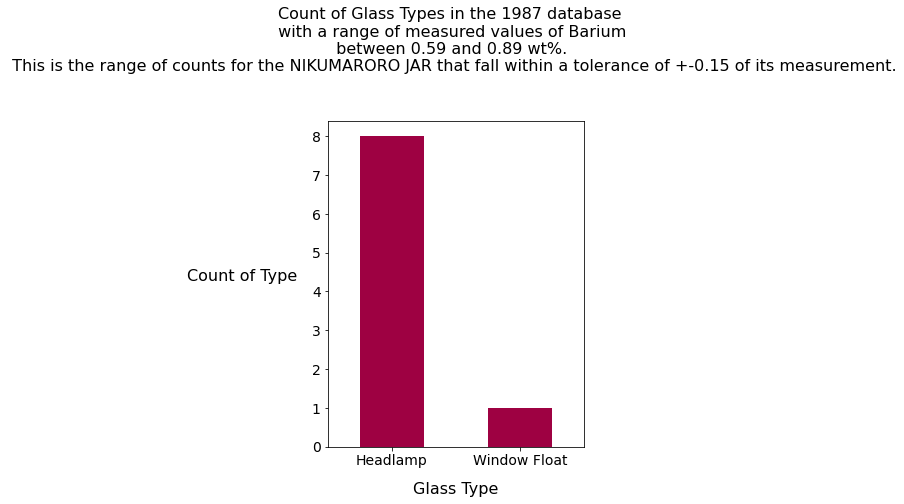

In [9]:
dataset.replace({"GlassType": dict},inplace=True)
element='Ba'
Badict={'clear facsimile':[0.22, 0.52],'Nikumaroro jar':[0.59,0.89]}
low=0
high=dataset[element].max()

#Run report for all glass types
numgroups(element,low,high,None)

#Run reports for the clear facsimile and Nikumaroro jar
for jar_type in Badict:
    low=Badict[jar_type][0]
    high=Badict[jar_type][1]
    numgroups(element,low,high,jar_type)

### Barium Analysis

Barium:<br>
The ratio of 2:1 for the element Barium in the two glass samples (.74 for the Nikumaroro jar and .37 for the clear facsimile jar) suggests that the glass maker, Hazel-Atlas, used a recipe. This is not uncommon in the glass industry. 
For the clear facsimile, one window, one container and one headlamp have measurements of barium in the database that are within +- 0.15 of its measured value of barium.
For the Nikumaroro jar, eight headlamps and one window have measurements of barium in the database that are within +-0.15 of its measured value of barium.

Conclusion: We have not yet applied machine learning to the identification of the Nikumaroro jar or the clear facsimile, but it would appear from the weight percent of some of the key ingredients from these jars that windows, of the float or non-float variety, and, to a lesser extent, headlamps, are strong candidates for how the 1987 database might predict their identity, if machine learning were employed as a predictive tool to do this. Nevertheless, some containers did appear in the bar graphs for the clear facsimile, indicating that there is at least a slight resemblance between that jar and containers from the U.K. database. The results are not exactly encouraging to the success of a machine learning model, but they are not discouraging enough to dampen curiosity at discovering what machine learning might be able to do with the data from the Nikumaroro jar and the clear facsimile.

### Turning the question around: If one were to subset the 1987 database only for containers, how would that database compare with the two jars?  Both of the jars are, of course, containers.

In [10]:
sampcont = dataset[dataset['GlassType'].isin(['Container'])]
sampcont=sampcont.drop(['ID', 'GlassType'], axis=1)
print('Container summary report:')
display(sampcont.describe())
rangedict = {'Ba':['Barium',[.37,.74]],
                 'Mg':['Magnesium',[2.4,4.3]],
                 'Ca':['Calcium',[3.6,8.5]]}
ELEMENTS=['Mg','Ca','Ba']
for element in ELEMENTS:
    print()
    print(
        element,': min to max:',sampcont[element].min(),'to'
        ,sampcont[element].max())

    facsimile_ref=rangedict[element][1][0]
    artifact_ref=rangedict[element][1][1]
    print('reference: Clear facsimile jar =',facsimile_ref,'wt%'
              '\n Nikumaroro jar=',artifact_ref,'wt%')

Container summary report:


,Ref_ix,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
std,0.003345,0.777037,0.999146,0.693920,1.282319,2.138695,2.183791,0.608251,0.155588
min,1.513160,11.030000,0.000000,1.400000,69.890000,0.130000,5.870000,0.000000,0.000000
25%,1.516660,12.730000,0.000000,1.560000,72.180000,0.380000,9.700000,0.000000,0.000000
50%,1.519940,12.970000,0.000000,1.760000,72.690000,0.580000,11.270000,0.000000,0.000000
75%,1.521190,13.270000,1.710000,2.170000,73.390000,0.970000,11.530000,0.000000,0.000000
max,1.523690,14.010000,2.680000,3.500000,73.880000,6.210000,12.500000,2.200000,0.510000



Mg : min to max: 0.0 to 2.68
reference: Clear facsimile jar = 2.4 wt%
 Nikumaroro jar= 4.3 wt%

Ca : min to max: 5.87 to 12.5
reference: Clear facsimile jar = 3.6 wt%
 Nikumaroro jar= 8.5 wt%

Ba : min to max: 0.0 to 2.2
reference: Clear facsimile jar = 0.37 wt%
 Nikumaroro jar= 0.74 wt%


When we restrict the U.K. database to only containers, the comparisons with the Nikumaroro jar and the clear facsimile enter into sharper relief. The clear facsimile has a high magnesium content for a container but this is still within range of the lowest and highest values within the U.K. database. The jar from Nikumaroro has a magnesium content much higher than that of the highest nearest neighbor in the U.K. database.

The clear facsimile has a calcium measurement lower than that of all the containers in the U.K. database. This indicates, perhaps, that calcium was not as heavily used in glassmaking in the early part of the twentieth century. The Nikumaroro jar has a calcium content, 8.5, that is lower than the 25th percentile. This is a low value for a container, especially when one considers that the mean for containers in the U.K. database, 10.12, is skewed toward the higher end of the range.

The clear facsimile jar and the Nikumaroro jar are within the range of minimum to maximum in barium weight percentage for containers; however, most of the measured values of barium in the database are zero. The measured values of barium for the clear facsimile and the Nikumaroro jar are still far higher than those usually found in the U.K. database.

### What do the correlations between elements for the different types of glass in the 1987 database reveal about late 20th century glassmaking, as compared with early 20th century glassmaking?
To answer this question, we can generate custom diverging colormaps from the U.K. database (excluding our samples of clear facsimile and Nikumaroro jar). The correlation colormaps, also known as heatmaps, show, for example, which elements of the glass most strongly correlate with refractive index, which may be considered synonymous with brilliance. 

To keep the number of graphs to a manageable amount, we will restrict them to the glass types of Window Float, Window Non-Float and Containers. These three heatmaps provide a good summary of the correlations of ingredients in glassmaking of the late twentieth century.

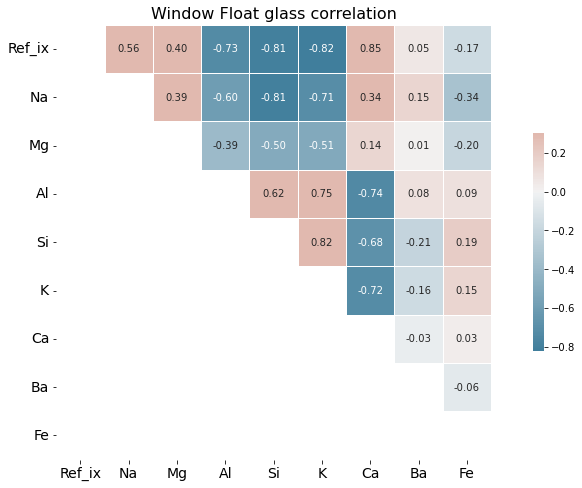

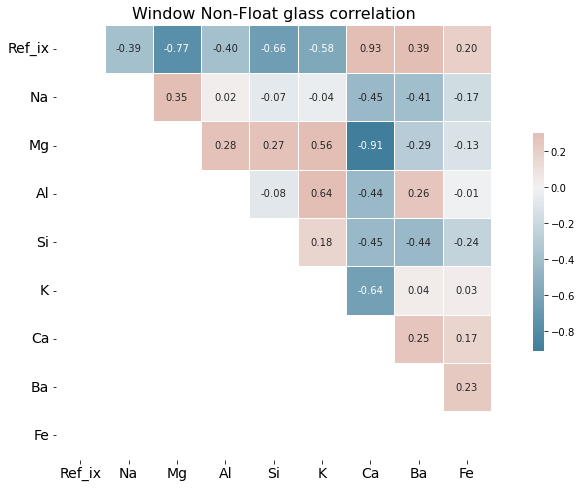

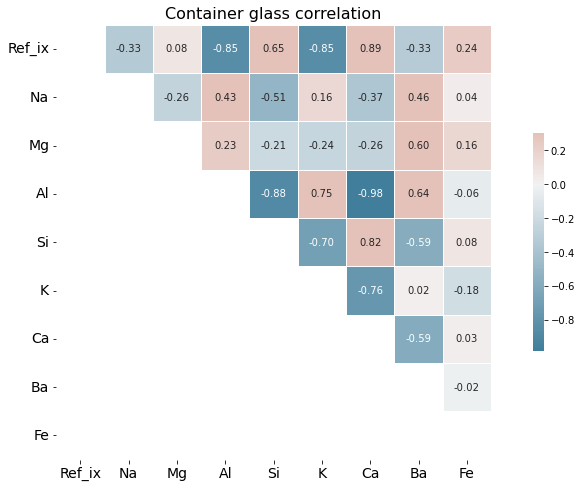

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

# There is a warning about setting a copy of a slice from a dataframe: ignore
warnings.filterwarnings('ignore')

TYPES = ['Window Float', 'Window Non-Float', 'Container']

def get_dataset(src, glass_type):
    #subset the df into a new df
    df = src[src.GlassType == glass_type]
    df.drop(['ID'], axis=1,inplace=True)
    return df

def make_heatmap(source, title):
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    corr=source.corr()
    # Generate a mask for the lower triangle
    mask = np.tril(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
    vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=14,rotation=0)
    plt.yticks(fontsize=14,rotation=0)
    plt.gcf().set_size_inches(15, 8)
    return plt, title

def update_heatmap(glass_type):
    src = get_dataset(dataset, glass_type)
    title = make_heatmap(src, glass_type + ' glass correlation')
    plt.title.text = title
    plt.show()

for kind_of_glass in TYPES:
    update_heatmap(kind_of_glass)

# Instead of using a for-loop, it is also possible to have an interactive exhibit, using this Python syntax:
#interact(update_heatmap, glass_type=TYPES);

### Analysis of Correlation Heat Maps
One might expect barium, an ingredient used to increase brilliance, thus increasing refractive index, would be positively correlated with refractive index in these graphs. Barium, however, is frequently measured at 0.0 weight percent in the 1987 dataset or present in only trace amounts. It may be that late 20th century glassmaking does not incorporate barium to the same degree that it was incorporated into glass production of the early twentieth century. For an example of the importance of barium in the early 20th century, see a 1936 Hazel Atlas glass patent [here](https://tighar.org/Projects/Earhart/Archives/Research/ResearchPapers/freckleintime/Document_05_FrancisFlint1936patent.pdf).

Calcium, in the form of calcium oxide, is highly correlated in the 1987 database with refractive index. This is due to the fact that calcium oxide increases refractive index. See https://www.academia.edu/12254939/Optical_and_mechanical_properties_of_calcium_phosphate_glasses for a study of this effect. There is good evidence that calcium was the element of choice to increase brilliance in 1980s glass production, rather than barium. The toxic effects of barium, which is a heavy metal, were becoming much better understood by the time the U.K. researchers assembled their database. The World Health Organization published a [memorandum](https://inchem.org/documents/hsg/hsg/hsg046.htm#SectionNumber:4.1) in 1991 in which it specifically warned of the dangers of barium in glass production. One prominent U.S. [patent](https://patentimages.storage.googleapis.com/7e/18/e1/18b38abaca0806/US8877663.pdf) from 2013 specifically mentions CaO (calcium oxide) as an ideal substitute for metals such as barium and lead.

By contrast, in the early twentieth century barium was a favorite ingredient of glassmakers. As Francis Flint described in his patent (cited above), the use of barium sulfate increased brilliance, but the sulfates needed then to be reduced to prevent small seeds forming in the glass mixture, thus reducing the quality of the glass. Flint recommended zinc, magnesium, aluminum or tin as reducing agents. Sodium and calcium have been recommended in more modern literature of the art.[3] In window non-float glass, aluminum is positively correlated with barium.

It would seem good practice to analyze the correlations of each of these glass types separately, as we have done, since obviously the desired qualities of the glass will differ depending on the uses to which the glass will be put, and thus recipes will differ accordingly. The desired refractive index and brilliance of vehicle float glass will be far different than that of container or tableware glass, for example.

The elemental correlations in this 1987 database suggest changing priorities between production techniques of the early twentieth century and production techniques of the 1980s, toward more utilitarian styles and techniques. One does not require statistics to observe that container glass with high refractive index has become less common, if it ever was, giving way to containers in which seeing the contents clearly through the glass is the overriding concern. This change will probably affect what specific types of glass that a machine learning model can correctly predict for much earlier samples that it has not seen.

Now we turn to our last question.

### Using machine learning to train a model on the 1987 database, can that model be used to identify the type (container) of one or both of the jars unseen by the model?

This should be a straightforward machine learning classification problem. The first step is to gather up relevant modules from various sci-kit learn and imbalanced learning libraries, using multiple import statements.

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_absolute_error, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import set_printoptions, where

### Setting the stage for an attractive output
Next, we will address the fact that the output we want to see needs to be prepared for attractive presentation. After we have generated predictions for the identity of the jars, we will generate, additionally, probability reports that outline the likelihood of the predictions. The standard probability scores supplied by the predict_proba function appear rather clumsily, as:
    
[[0.42 0.4  0.07 0.04 0.   0.07]]

This output is a sequential list of probabilities that corresponds to the sequence of integer types supplied by the original 1987 database. The sequence is implied; that is, the 0.42 above is presumed to be the first type, Window Float, the 0.4 is presumed to be the second, and so on.
    
In their stead, it would be nice to have an equivalent and more readable report that formats the 2d array to 
appear like this:
    
    The Nikumaroro jar has a probability of:
    A% to be a Window Float
    B% to be a Window Non-Float
    C% to be a Vehicle Float
    D% to be a Headlamp
    E% to be a Container
    F% to be a Tableware
    
To achieve this, we will want to re-sort the 2D list by descending order of probability, but when this is done, the implied sequence will no longer be of any use in identifying the glass types.
    
To solve for this, we will make an explicit counter variable. This new explicit counter, once created, will correspond with the original integer type values supplied by the 1987 database and will not be subject to the alteration that the implied index would experience when sorting.

In [13]:
from colorama import Fore, Back, Style

def make_nicer_probability_output(array_to_convert,title):
    """
    Author: Joe Cerniglia
    Date: March 20, 2022
    A function to convert the standard probability scores in Python machine learning libraries
    to a report that supplies the categories from a dictionary and sorts the list of probabilities in
    descending order.
    
    Parameters:
    array_to_convert: an array to convert to a sorted 2d list 
    title: some text to be placed in the title or headings of the report
    Preconditions:
    The array must have the exact number of elements and format needed for the dictionary
    and must be the output of a call to model.predict_proba
    
    returns None. The function itself prints the report.
    """
    prob_list = array_to_convert.tolist()
    #print(prob_list)
    
    # The counter can be used as a dictionary key for a 
    # dictionary we will create in the next step
    counter=0
    for probability in prob_list[0]:
        prob_list[0][counter]=[counter,probability]
        counter+=1
    #print(prob_list)
    # We have a 3d list; get back to the 2d list
    prob_list=prob_list[0]
    # Sort in descending order the second column of each row in the 2d list
    # This allows for a descending order of probability and for the
    # predicted type (highest probability) to rise to the top of the list
    
    # The lambda expression below takes each line (l) of the list as its 
    # argument. The expression after the colon, l[1], is the function, 
    # which takes the second variable in the line and sorts the line in 
    # descending order by that variable
    prob_list=sorted(prob_list,key=lambda l:l[1], reverse=True)

    counter=0
    for prediction in prob_list:
        if counter==0:
            print(Fore.BLACK + 'The ' + title + ' has a probability of:')
        if prediction[0]==3:
            pred=Fore.RED + probdict[prediction[0]]
        else:
            pred=Fore.BLACK + probdict[prediction[0]]
        print(Fore.BLACK + "{:.0%}".format(prediction[1]),'to be a', pred)
        counter+=1
    return None

There is one last piece of code that is needed to have this function work properly. We need to define a dictionary that will translate the counter variable above into English. This dictionary is called in the last for-loop of the function above. Notice that this dictionary is different than the one we created at the beginning, since it is now indexed sequentially starting at 0 and explicitly omits Vehicle Non-Float, a category for which there exist no examples in the database. Note also that we will only use this dictionary inside this function. When we need to translate the numerical glass types found in the 1987 database elsewhere in this code, we will still use the dictionary (dict) that we defined earlier.

In [14]:
# This dictionary orders the possibilities of the 2d
probdict = {0: 'Window Float',
  1: 'Window Non-Float',
  2: 'Vehicle Float',
  3: 'Container',
  4: 'Tableware',
  5: 'Headlamp'}

### Split the data into feature set X and target set Y.
Now with the correct modules imported, and our utility function defined, we can split the database into two arrays. First, we can use the pandas dataframe values method to convert the entire dataframe we set aside earlier to an array. Next, we can slice the array column-wise into X and Y arrays, with X as our features array and Y as our target array. Note that our columns are sliced from the number 1, which is actually the second variable in the array, not from the number 0. The reason is that we need to drop the ID variable. The ID variable is an index. It would improve the accuracy of our machine learning model (to 100% in fact!), but this accuracy would be a mirage. It would not accomplish our goal of training the model in how to classify unseen examples.

In [15]:
array = dataset_ml.values
print(type(array))
X = array[:,1:10]
Y = array[:,10]

<class 'numpy.ndarray'>


### Show the list of data features ranked by their power to influence prediction of the target variable.
Earlier, we stated that we would make some educated guesses as to the values of the jars' features that were either unavailable (refractive index) or not stated in the required units of weight percent (Fe, K, Si). We did not do this without some trepidation, since tampering with these features' values would appear to reduce the rigor of our analysis. However, the benefits of having a complete training dataset appeared to outweigh these drawbacks. 

The impact of this decision was unknown, but it was not unknowable. There is a method to assess the power of a given feature to influence the classification of a given sample of glass. This method is known as feature selection. Using feature selection, we may see a list of all the features in the dataset ranked in order of strongest to least strongest influence on the prediction of the class. If the features we modified were ranked highly in this list, we should be concerned about the integrity of the analysis. If the features we modified were not ranked highly in this list, we can proceed with our analysis with the confidence that the algorithm will be untroubled by our expedient modifications to the original data.*

The results were as favorable as one might have hoped. Using the SelectKBest class from the scikit-learn library, we can see that the variables for which we needed to supply values (highlighted in gold) were ranked toward the bottom of the ranked list. 

The code that appears below takes the Numpy array created by SelectKBest and transforms it into a concise report that lists the relative importance, ranked descending, for all of the features in the glass database.

#### (*Note that we also evaluated the effect of the features empirically. An additional experiment to run this program with a range of values for K,  Si, Fe, and Ref_ix did not materially alter the predictions of the machine learning algorithm.)


In [56]:

names=['Ref_ix','Na','Mg','Al','Si','K','Ca','Ba','Fe']

# feature extraction using univariate selection
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores

# Convert scores to dataframe
df_scores = pd.DataFrame(fit.scores_)
# Convert names list to dataframe
df_names = pd.DataFrame(names) 
# Join two dataframes by indexes
best_features=pd.concat([df_scores, df_names], axis=1)
# change the type of the columns from int to str
best_features.columns = best_features.columns.astype(str)
# rename the columns to have more sensible names
best_features.columns.values[0] = "Score"
best_features.columns.values[1] = "Feature_Name"

# sort the rows (features) by rank in descending order
best_features.sort_values(by='Score', ascending=False, inplace=True)
# Add a column for rank to the dataframe
best_features['Rank'] = np.arange(1,len(best_features)+1)
# Re-order the columns
best_features = best_features[['Feature_Name', 'Score','Rank']]
# Format the dataframe to give the score two decimal places
best_features = best_features.style.format({'Score': "{:.2f}"})
#print(type(best_features))
best_features=best_features.data

def color_relevant_gold(row):
    """
    Takes a dataframe row and returns a string with
    the background-color property `'background-color: gold'` for relevant
    rows, black otherwise.
    """
    if (row.values[0] == 'K'  or row.values[0] == 'Ref_ix' or row.values[0] == 'Si'
        or row.values[0] == 'Fe'):
        color = 'gold'
    else:
        color = ''
    return ['background-color: %s' % color]*len(row.values)

# There is a problem in rendering the Pandas properly, so I am embedding this code within a function 
# and pasting in the image that Jupyter Notebook renders.
def awaiting_resolution():
    print('      ----Best features----')
    from IPython.display import display, HTML
    # There is a deprecation warning here that is unclear how to resolve
    warnings.filterwarnings('ignore')
    display(HTML(best_features.style.apply(color_relevant_gold, axis=1).render()))
    # Turn warnings back on again
    warnings.filterwarnings('always')

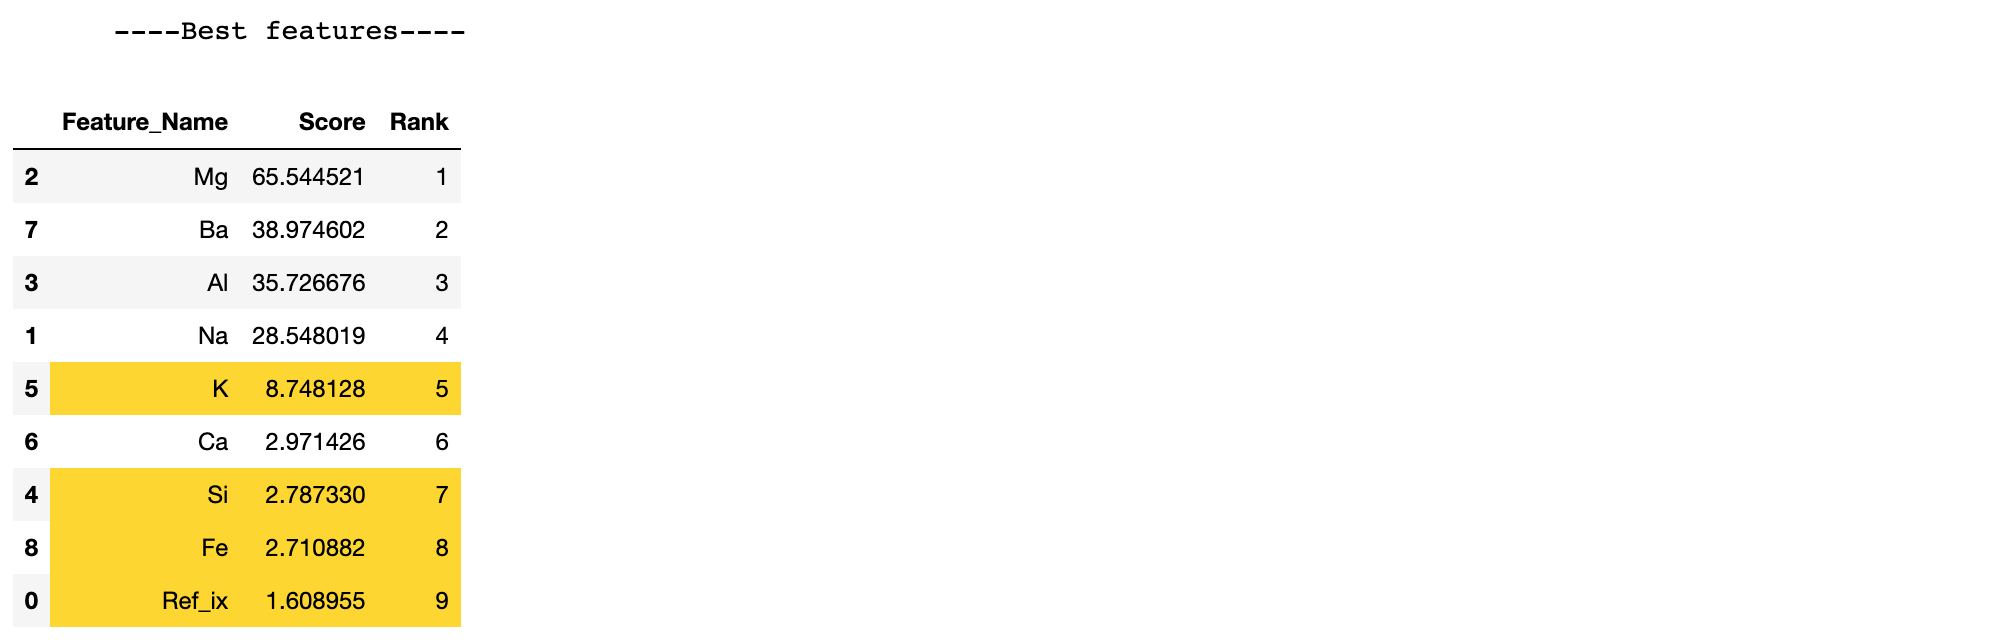

### Split the data into training and validation sets.
To create the conditions under which we will have the ability to test our future model's effectiveness at classifying unseen data, we can now split both X and Y into validation and training arrays. The "train" pair of arrays can then be used for training the model, and the "validation" pair of arrays can be used to demonstrate how effective the model is after we have trained it. To do this, we will use the train_test_split function from sklearn's model_selection library. We will create an 80-20 split of the data by entering a test_size parameter of 0.20. The training set will be 80% of the data, and the validation set will be 20% of the data. We will stratify the data so that the relative proportion of glass types in both pairs of training and validation sets is equivalent, despite the fact that the arrays are of different overall sizes.

In [17]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed, stratify=Y)
print(type(X_train))

<class 'numpy.ndarray'>


### Add the Nikumaroro jar and clear facsimile into the X and Y validation datasets.
Next, we need to add our two jars (clear facsimile and Nikumaroro jar) to the validation arrays. The features of these two jars will be added to X_validation, and the target (glass type) of these two jars will be added to Y_validation. Having accomplished this, we will then have added two glass samples that the study authors could not possibly have anticipated when they built their database in 1987. This will be a great test of the skill of machine learning algorithms in general and of the completeness of their original dataset in particular.

To demonstrate that our jars have been added successfully, we will print out the shape of the validation arrays both before and after performing the append operations. Note that the shape returns a tuple, providing the number of rows, followed by the number of columns, separated by a comma.

The append operations for arrays are a little tricky. To do this, in addition to using numpy's append method, we need to chain to that the reshape method to size the array appropriately prior to appending to it. The chained command executes from right to left, first reshaping the array to which we are appending, and then performing the append operation itself.

In [18]:
#names=
#  ['Ref_ix','Na',  'Mg',   'Al', 'Si',  'K',  'Ca',  'Ba',  'Fe']

artifact_features=[1.52369,  13.1,  4.3,  .74,   72.37,  .24,  8.5,  .74,  .02]
facsimile_features=[1.51316, 11.7,  2.4,  .85,   72.37,  .12,  3.6,  .37,  .01]
artifact_features_array=np.array(artifact_features)
facsimile_features_array=np.array(facsimile_features)
print('shape of X_validation before adding jars:',X_validation.shape)

X_validation=np.append(
X_validation,artifact_features_array).reshape(X_validation.shape[0]+1,9)
X_validation=np.append(
X_validation,facsimile_features_array).reshape(X_validation.shape[0]+1,9)
print('shape of X_validation after adding jars:',X_validation.shape)

# 5 is equal to a container, the actual identity of the Nikumaroro jar and of the facsimile
artifact_identity=[5.0]
facsimile_identity=[5.0]
artifact_array=np.array(artifact_identity)
facsimile_array=np.array(facsimile_identity)
print('shape of Y_validation before adding jars:',Y_validation.shape)

Y_validation=np.append(
Y_validation,artifact_array).reshape(Y_validation.shape[0]+1)
Y_validation=np.append(
Y_validation,facsimile_array).reshape(Y_validation.shape[0]+1)
print('shape of Y_validation after adding jars:',Y_validation.shape)

shape of X_validation before adding jars: (43, 9)
shape of X_validation after adding jars: (45, 9)
shape of Y_validation before adding jars: (43,)
shape of Y_validation after adding jars: (45,)


### Create a list of models to begin the testing process of choosing the best one.
Now comes the heart of the machine learning program, the creation of models, also known as machine learning algorithms. There are many different kinds of machine learning algorithms. Each has its own strengths and weaknesses. The skill of machine learning algorithms on particular datasets will vary. Some will show very little skill in exposing the structure of the data, resulting in a model that cannot classify unseen glass examples very accurately. Others will show much greater skill. We want to test a variety of machine learning algorithms on the data so that we can select the model that is most likely to succeed in classifying the type of glass for this particular set of data.

Machine learning algorithms come in two basic varieties: regression and classification. Regression algorithms treat our target variable (glass type) as a continuous variable. This means that they consider the targets as floating point numbers rather than as discrete integers. Classification algorithms treat the target variable as discrete categories. There is every advantage in testing both varieties, rather than trying to anticipate in advance which type of model might perform best.

In [19]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)))
models.append(('CART Regressor', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNClass',KNeighborsClassifier(n_neighbors=5)))
models.append(('RandomForest',RandomForestClassifier(
n_estimators=100, max_features=9,class_weight='balanced')))

### Score the models.
There are many methods for scoring the effectiveness of different models so that they may be compared side by side. Some of these methods work optimally for regression models; others work optimally for classification models. The negative mean squared error, while not optimal for classification models, is acceptable for use in multi-class datasets such as this one, and it works very well for regression models. Thus, it is a good 'all-purpose' scoring method for our needs.

What this code snippet does is to evaluate the success of each of the models defined above by repeatedly testing them on different randomized 'folds' of the data. The results of each test will not be the same. Each will vary to a lesser or greater extent, depending on which fold is selected. The score is actually a composite result of repeated tests on many folds. The negative mean square error score is expressed as a negative number, such that the highest negative number, that which is closest to zero, will be considered to have the best score. The standard deviation, given in parentheses, provides a sense of how much variation to expect within a given score.

In [20]:
# Test options and evaluation metric
scoring = 'neg_mean_squared_error'
# evaluate each model in turn
results = []
names = []
print('Evaluation of Mean Square Error results of different models')
for name, model in models:
  kfold = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=7)
  cv_results = cross_val_score(
  model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Evaluation of Mean Square Error results of different models
LR: -1.206907 (0.388832)
LASSO: -2.496606 (0.292277)
EN: -2.112353 (0.293161)
KNN: -0.980076 (0.386747)
CART Regressor: -1.369683 (0.661765)
SVR: -4.767184 (0.520934)
KNClass: -1.683810 (0.841334)
RandomForest: -1.039762 (0.661325)


### Graph the score results.
The test results above are complete, but they are a little hard to read. It would be far easier to evaluate a graphical representation of the data using a box plot. The box plot below takes each machine learning algorithm and places it alongside its neighbors for easy comparison. Note that there are tuning and scaling operations that might have incrementally increased the accuracy of our models, which have not been employed here.

Based on the graph, it would appear that the Random Forest Classifier, a model with an excellent reputation among classification models, is an effective model, but KNN and Cart Regressor also seem competitive. In actual practice, however, KNN and CART produced a far less accurate result. When testing these models, the resulting confusion matrix (see below for an explanation of the confusion matrix) showed that these models are actually fairly weak.

This illustrates an important point: Multiple scoring methods are often required to see which model offers the best results. Still, a box graph such as the one shown below can narrow the number of judgments that must be made.

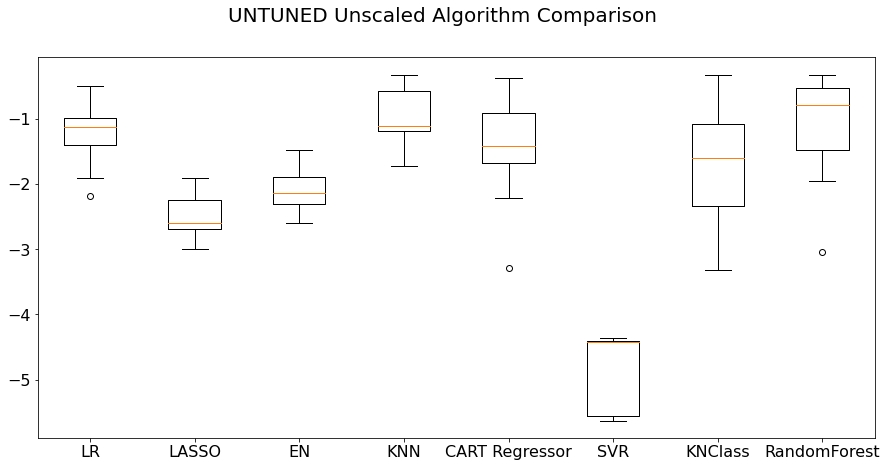

In [21]:
 # Compare Algorithms
fig = plt.figure()
fig.suptitle('UNTUNED Unscaled Algorithm Comparison',fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.gcf().set_size_inches(15, 7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Oversampling, explained
Random Forest often pairs well with oversampling techniques, such as SMOTE (Synthetic Minority Over-sampling Technique). What SMOTE will do is to magnify certain classes that are sparsely represented in the training dataset. This magnification will allow the training process to resolve these under-represented classes more effectively, because it will have seen more examples than were initially presented. For example, tableware has only seven examples in the training dataset. By applying SMOTE to the training dataset, this number is magnified to 61. In fact, all of the glass types are 'leveled' to 61 examples after SMOTE is applied. This leveling will make it much easier for the Random Forest Classifier to classify unseen examples to a greater level of accuracy.

Now we can observe a comparison of counts for each of the glass types before and after the application of SMOTE. This is only a test to see what the counts would be. Later on, we will apply SMOTE to the definition of our model. Our dictionary will come in handy here to translate the numerical glass types found in the 1987 database to their English equivalents.

In [22]:
counter=Counter(Y_train)
print('Counts Before SMOTE:')
for ele in counter:
    print(dict[int(ele)],':',counter[ele])
oversample = SMOTE(random_state=42,k_neighbors=5)
X_trainsm, Y_trainsm = oversample.fit_resample(X_train, Y_train)
countersm=Counter(Y_trainsm)
print()
print('Counts After SMOTE:')
for ele in countersm:
    print(dict[int(ele)],':',countersm[ele])

Counts Before SMOTE:
Window Float : 56
Headlamp : 23
Vehicle Float : 14
Window Non-Float : 61
Tableware : 7
Container : 10

Counts After SMOTE:
Window Float : 61
Headlamp : 61
Vehicle Float : 61
Window Non-Float : 61
Tableware : 61
Container : 61


### Visualizing SMOTE
Seeing the change in counts before and after the application of SMOTE oversampling is an excellent way of visualizing what SMOTE does. Another way to do this is to create a scatter plot on two elements of the periodic table and compare where the points are plotted before and after the application of SMOTE. The graphs following this function encode each dot with a color. The legend in the upper right corner of the graph shows which glass type each color represents.

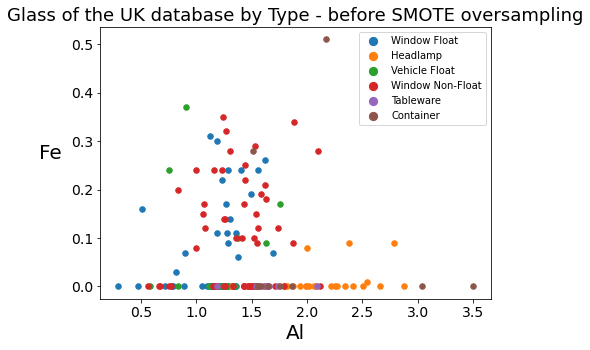

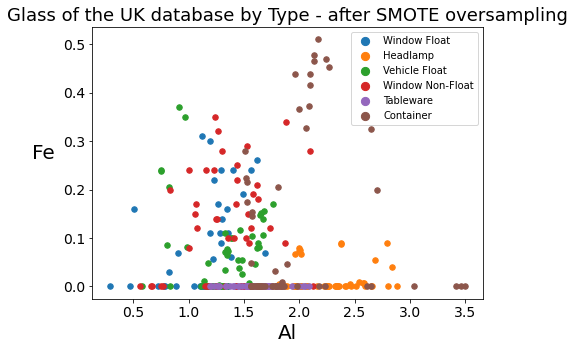

In [23]:
names=['Ref_ix','Na','Mg','Al','Si','K','Ca','Ba','Fe']
def smotegraph(title_suffix, var_suffix=None):
    """
    Author: Joe Cerniglia
    Date: September 17, 2022
    A function to plot two scatter graphs to show the distribution of glass types over two 
    elements of the periodic table.
    
    Parameters:
    title_suffix: string that provides title text for which training dataset has been 
    graphed, original or SMOTE-oversampled.
    var_suffix: string to indicate which training dataset to use in the plot
    
    returns None. The function produces graphs but does not return anything outside the function itself.
    """
    # scatter plots of examples by class label: Aluminum (3) x Iron (8)
    plt.figure(figsize=(7,5))
    for label, _ in counter.items():
        # row_ix returns an array containing all the row numbers for a given label (color)
        if var_suffix==None:
            row_ix = where(Y_train == label)[0] #slicing with zero allows access 
                #to the array embedded inside the tuple returned by the where
            plt.scatter(
                X_train[row_ix, 3], X_train[row_ix, 8], label=dict[label], alpha=1, s=30)
        else:
            row_ix = where(Y_trainsm == label)[0]
            plt.scatter(
                X_trainsm[row_ix, 3], X_trainsm[row_ix, 8], label=dict[label], alpha=1, s=30)
    plt.legend(markerscale=1.5, fontsize=10)
    plt.title("Glass of the UK database by Type" + title_suffix, fontsize=18)
    plt.xlabel("Al",fontsize=20)
    plt.ylabel("Fe",fontsize=20, rotation=0, labelpad=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    return None
smotegraph(' - before SMOTE oversampling')
smotegraph(' - after SMOTE oversampling','sm')

The second graph clearly shows the number of dots on the graph increased. SMOTE creates observations that did not exist in the original U.K. database but which are nearest neighbors. Note especially how the upper right quadrant now has a number of containers (brown dots) where only one existed before! These observations have moderate amounts of iron in them. Iron increases refractive index, which generally means that glass with high iron content is less transparent. Since containers, especially for products, once equated translucency with luxury, these synthetic observations created by SMOTE seem plausible. Note also the row of purple dots at the bottom of the graph. These are tableware samples created by SMOTE that have low iron content, and thus are highly transparent, which seems quite correct for tableware.

### Build data pipelines that can be used to input the training data.
Now that we have seen what the counts would be for an oversampled training dataset, we can create a data pipeline that combines SMOTE with our previously selected model, Random Forest Classifier. To test the efficacy of SMOTE, we should create two models. The first model we create will have the ability to apply a Random Forest Classifier to a non-oversampled dataset. The second will have the ability to apply Random Forest Classifier to an oversampled dataset. We will also want to add in a standard scaler to both model pipelines. The standard scaler takes features of different scale and makes them more similar in scale. This technique is very useful in further enhancing the model's ability to classify.  Note that even after we have defined our model pipelines, we have not yet supplied any data to them.

In [24]:
modelnoSMOTE=make_pipeline(
StandardScaler(),RandomForestClassifier(
n_estimators=100,max_features=9,class_weight='balanced'))

modelwithSMOTE=make_pipeline(
StandardScaler(),SMOTE(
random_state=42, k_neighbors=5),RandomForestClassifier(
n_estimators=100,max_features=9,class_weight='balanced'))

### Fit the non-SMOTE model to the training data to train the model.
First, we will use and evaluate the non-SMOTE model. We will apply the non-SMOTE model to actual data by supplying it with our training data. The fit method applies the model by using the training features and targets to learn how to generalize to unseen validation data. 

In [25]:
modelnoSMOTE.fit(X_train, Y_train);

### Apply the trained non-SMOTE model to unseen data.
Now we can test the model's performance by applying it to unseen data (X_validation) and generating a report on the accuracy of its performance.

The variable called predictions takes our validation features and attempts to classify what type of glass the features for each example represents. Recall that we added in the two jars to our validation dataset, and so these predictions will include them.

In [26]:
predictions = modelnoSMOTE.predict(X_validation)

### How to Read a Confusion Matrix
The confusion matrix need not be confusing. It provides all the predictions in a matrix. Think of the columns and rows of the matrix as having been labeled with the names of the integer glass types, ordered left to right and top to bottom, in sequence. Row labels represent the true values, and column labels represent the predicted values. The intersection of true and predicted represents the status of any given cell in the matrix. Using this matrix, we can tell how many predictions were correct, how many were over-predicted, and how many were under-predicted. The diagonal line that can be drawn from the top left of the matrix to the bottom right, slicing the matrix into two equal diagonal halves, represents correct predictions (true=predicted). Each number in the same row as a correct prediction represents an under-prediction. In other words, the model under-predicts when the number of correct predictions for a category is less than the actual number in that category. By summing all of the numerals in any given row, we obtain the true number of glass types for each type. Each number in the same column as a correct prediction represents an over-prediction. In other words, the model over-predicts when the number of total predictions for a category in a given column is more than the correct predictions in that category. 

In [27]:
print('Random Forest without SMOTE oversampling')
print(confusion_matrix(Y_validation, predictions))

Random Forest without SMOTE oversampling
[[13  1  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 1  1  0  2  0  1]
 [ 0  1  0  0  1  0]
 [ 2  0  0  1  0  3]]


### Cohen's Kappa
The Cohen's Kappa statistic is a measure of inter-rater reliability. The "raters," in this machine learning example, are the actual glass types and the predictions of those types. In addition to considering the extent of agreement between these two, it also includes statistical consideration of the probability that this agreement could have occurred by chance.

The kappa score for the non-SMOTE Random Forest model is considered reasonably good.

In [28]:
kappa=cohen_kappa_score(Y_validation, np.round(predictions,0))
print('Kappa (1=perfect;0=chance;<0=worse than chance): %f' % kappa)

Kappa (1=perfect;0=chance;<0=worse than chance): 0.602311


### Mean absolute deviation
The mean absolute deviation, or MAD, is a measure of the average distance between each data value and the average value of the dataset. In terms of the confusion matrix above, it provides a sense of how far the values are distributed away from the central diagonal line.

In [29]:
MAD = mean_absolute_error(Y_validation, predictions)
print('MAD (Mean Absolute Dev): %f' % MAD)

MAD (Mean Absolute Dev): 0.822222


### The classification report
The classification report calculates precision and recall. Precision is the number of correct guesses in a class divided by the total guesses in a class. It can be obtained by observing the columns in the confusion matrix. Recall is the number of correct guesses in a class divided by the total number of actual members of the class. It can be obtained by observing the rows in the confusion matrix. The f1-score is the harmonic mean of precision and recall and is a good overall indicator of model effectiveness. Support is the true count for each type.

In [30]:
print(classification_report(Y_validation, predictions, zero_division=1))

              precision    recall  f1-score   support

         1.0       0.65      0.93      0.76        14
         2.0       0.80      0.80      0.80        15
         3.0       1.00      0.33      0.50         3
         5.0       0.50      0.40      0.44         5
         6.0       1.00      0.50      0.67         2
         7.0       0.75      0.50      0.60         6

    accuracy                           0.71        45
   macro avg       0.78      0.58      0.63        45
weighted avg       0.74      0.71      0.70        45



### Observe the predictions for the Nikumaroro jar and the clear facsimile.
Since we already added the clear facsimile and Nikumaroro jar to the validation dataset, the model has already made its predictions for these two samples. However, the evaluation thus far has not directly revealed what those predictions actually were. Now we will want to observe for ourselves how the model behaves toward these particular instances of the data. To do this, we can simply enter the array for each sample that we created above into the predict method of the noSMOTE model. We may obtain the underlying probabilities for these predictions by using the predict_proba method of the noSMOTE model.

In [31]:
yhat = modelnoSMOTE.predict([artifact_features])
print('Nikumaroro jar prediction:',dict[int(yhat)])
yhat2 = modelnoSMOTE.predict([facsimile_features])
print('clear facsimile prediction:',dict[int(yhat2)])
yhat_probability = modelnoSMOTE.predict_proba([artifact_features])
yhat2_probability = modelnoSMOTE.predict_proba([facsimile_features])

Nikumaroro jar prediction: Window Float
clear facsimile prediction: Headlamp


### Display the details of the jar prediction probabilities for the non-SMOTE model.
Now we have the opportunity to use the utility display function we created above. Nesting calls to this function inside another function will allow the report to be generated with a single call when we next run a report for the SMOTE version of our model. We can also here include extra niceties such as colored text to highlight probabilities for the Container class and check marks to indicate where the prediction was correct.

In [32]:
def the_report():
    if dict[yhat[0]]=='Container':
        print(Fore.BLACK + 'Nikumaroro jar prediction:',Fore.RED + dict[yhat[0]]+' ' + u'\u2713')
    else:
        print(Fore.BLACK + 'Nikumaroro jar prediction:',Fore.BLACK + dict[yhat[0]])
    make_nicer_probability_output(yhat_probability,'artifact')
    print()
    if dict[yhat2[0]]=='Container':
        print(Fore.BLACK + 'clear facsimile prediction:',Fore.RED + dict[yhat2[0]]+' ' + u'\u2713')
    else:
        print(Fore.BLACK + 'clear facsimile prediction:',Fore.BLACK + dict[yhat2[0]])
    make_nicer_probability_output(yhat2_probability,'clear facsimile')
    return

the_report()

Nikumaroro jar prediction: Window Float
The artifact has a probability of:
47% to be a Window Float
39% to be a Window Non-Float
11% to be a Headlamp
3% to be a Vehicle Float
0% to be a Container
0% to be a Tableware

clear facsimile prediction: Headlamp
The clear facsimile has a probability of:
48% to be a Headlamp
20% to be a Window Non-Float
16% to be a Window Float
15% to be a Container
1% to be a Tableware
0% to be a Vehicle Float


### Run the report again for the SMOTE model.
Having proceeded through a step-by-step analysis of the machine learning classification report we have built, we can now run the same report again, this time using the second SMOTE model we created. This model will, again: 
1. oversample the data with SMOTE
2. scale the data with StandardScaler 
3. classify each glass example with RandomForestClassifier and
4. output the numerical prediction and probabilities of glass type for the Nikumaroro jar and for the clear facsimile

In [33]:
modelwithSMOTE.fit(X_train, Y_train)

print()
print('Random Forest with SMOTE oversampling')
predictions = modelwithSMOTE.predict(X_validation)
ytrue=5
predictions=np.round(predictions, 0)

print(confusion_matrix(Y_validation, predictions))
kappa=cohen_kappa_score(Y_validation, np.round(predictions,0))
MAD = mean_absolute_error(Y_validation, predictions)
print('Kappa (1=perfect;0=chance;<0=worse than chance): %f' % kappa)
print('MAD (Mean Absolute Dev): %f' % MAD)
print(classification_report(Y_validation, predictions, zero_division=1))
yhat = modelwithSMOTE.predict([artifact_features])
print('Nikumaroro jar prediction:',dict[int(yhat)])
yhat2 = modelwithSMOTE.predict([facsimile_features])
print('clear facsimile prediction:',dict[int(yhat2)])
yhat_probability = modelwithSMOTE.predict_proba([artifact_features])
yhat2_probability = modelwithSMOTE.predict_proba([facsimile_features])   


Random Forest with SMOTE oversampling
[[13  1  0  0  0  0]
 [ 1 12  0  2  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 1  0  0  1  0  4]]
Kappa (1=perfect;0=chance;<0=worse than chance): 0.763469
MAD (Mean Absolute Dev): 0.466667
              precision    recall  f1-score   support

         1.0       0.81      0.93      0.87        14
         2.0       0.86      0.80      0.83        15
         3.0       1.00      0.67      0.80         3
         5.0       0.57      0.80      0.67         5
         6.0       1.00      1.00      1.00         2
         7.0       1.00      0.67      0.80         6

    accuracy                           0.82        45
   macro avg       0.87      0.81      0.83        45
weighted avg       0.85      0.82      0.82        45

Nikumaroro jar prediction: Window Non-Float
clear facsimile prediction: Container


### Display the detail of jar prediction probabilities for the SMOTE model.
Our final coding step will be to re-run the report of probabilities using our SMOTE-enhanced Random Forest Classifier model.

In [34]:
the_report()

Nikumaroro jar prediction: Window Non-Float
The artifact has a probability of:
50% to be a Window Non-Float
30% to be a Window Float
12% to be a Container
5% to be a Vehicle Float
3% to be a Headlamp
0% to be a Tableware

clear facsimile prediction: Container ✓
The clear facsimile has a probability of:
55% to be a Container
18% to be a Window Non-Float
13% to be a Headlamp
12% to be a Window Float
2% to be a Tableware
0% to be a Vehicle Float


### Analysis Procedure
Let us review the machine learning process that we have just created and executed. The following sequence of operations was performed:<br>
1) Create two arrays. The first contains the database features, all of the predictive columns of the original dataset. The second contains the target column, GlassType.<br>
2) Create a train-test, stratified split so that the model can be trained on 80% of the data and validated on a subsample of 20%.<br>
3) Add the two external glass sample jars to the validation (unseen) data, both for features (X) and for target (Y).<br>
4) Test a set of regression and classification models on the training dataset and report the MSE (mean squared error) results for each one, as well as the standard deviation of the MSE.<br>
5) Plot the preliminary effectiveness of each model on a box plot.<br>
6) Select the model most likely to succeed. In this case, Random Forest Classifier was selected.<br> 
7) Build two models of Random Forest Classifier, one without oversampling and the other with oversampling. Use the standard scaler in both models to make the scale of the features more uniform with one another.<br> 
8) Fit the models to the training dataset.<br>
9) Print a report on the performance of the models.<br>
10) For each model, print a report on the predicted result for both of the two unseen jars and the probability of the prediction for each glass type.<br>

### Findings
One of the most interesting findings was that when the SMOTE oversampling algorithm was used with the Random Forest Classifier, the resolving power of the model increased to the point that it was consistently able to identify the clear facsimile jar correctly as a container. Without the SMOTE oversampling algorithm applied, the model predicted the clear facsimile jar to be a headlamp. The prediction of container scored a distant third or fourth place.

The non-SMOTE model predicted the Nikumaroro jar to be a window, usually of the float variety*. This is very close to the prediction made by the model when SMOTE was used. Following application of SMOTE oversampling, the model predicted the Nikumaroro jar to be a non-float window.

These machine learning model predictions would seem to indicate that the clear facsimile jar can be correctly identified through prudent enhancement of the model with oversampling techniques. These techniques, however, are ineffective in increasing the ability of the model to predict the Nikumaroro jar to be what it is, a container.

Using a well-tuned model, the fact that a non-float window was predicted for the Nikumaroro jar demonstrates that this database of late 20th century glassware lacks enough relevant examples that would allow it to predict the Nikumaroro jar correctly.

\* Because the model is stochastic in nature, results will not be exactly the same each time.

### Covariate Drift and Why it Matters
This lack of relevant examples in the training data is a common phenomenon in machine learning, so common in fact that it has a name: covariate drift. Covariate drift is defined as a mismatch between the relative sizes or attributes of categories between the training and the validation data. There are many possible reasons for why covariate drift happens. The passage of time may have changed the population, or perhaps those assembling the training data did not obtain enough available samples from each population, or for whatever reason overlooked certain segments of a population altogether.

When extrapolating information about different populations, whether those populations be glass types, people, or some other collection, we want the categories we survey to be representative of the populations upon which we wish to generalize. If our validation data is not representative of the data we have used to train our model, that is a problem that needs to be addressed.

Before we can address it, however, we need to check whether it really exists, and, if so, how much it exists. We need to measure it.

### Measuring Covariate Drift
Shikhar Gupta, a data scientist at Amazon, has provided an excellent program/algorithm for obtaining quantitative measurement of covariate drift. His paper is here:
https://towardsdatascience.com/how-dis-similar-are-my-train-and-test-data-56af3923de9b.
I have modified his work by placing it inside a function that can generate multiple reports for different testing situations, and I have adjusted it for the particular situation of testing the U.K. database. I have also added in an ROC curve graph and a short report detailing the various data transformations that are happening as the function progresses.

The basic idea behind this function is to combine the training features (X_train) and validation features (Y_train) dataset, stacking one on top of the other, into a new features dataset, x. We can then create a new target dataset, y, by creating, for every observation in x, a row in y with a new variable, is_train. The is_train variable is a boolean value indicating whether or not each observation came from the original training dataset (prior to combining training and validation). The values in y may be used to compare predicted results with the actual results from the new target dataset.

Having combined training and validation into a new features dataset, x, and created a corresponding target dataset, y, we need a way to separate x and y horizontally into new training and validation datasets. We can create our new training and validation datasets by using stratified Kfold. Stratified Kfold will ensure that each subsection of the data that is produced will have the same ratio of training values (original training data) to validation values (original validation data). By the time all the folds have been produced, we will have created an array of predictions for every single observation in x. Each of these observations in x will have generated a prediction of whether it came from the original training or from the original validation. In essence, we are creating a 'blind test' in which the random probability that any given observation from x came from training or from validation is roughly equal.

This procedure is somewhat different than the traditional one of creating a single validation "holdout" dataset we would then use to test the skill of a given model. Instead, what we are doing is fitting each component Kfold to our Random Forest model, assigning a prediction to each observation in the training set created, and adding those predictions to a master array containing a prediction for every observation in the original x.

Each of the predictions that we generate will also have a probability associated with it. The probability calculates how likely is it that that the observation came from the training dataset. This probability can be used to create weighting factors that measure quantitatively a unit-less "distance" between each observation in the final Kfold and the original training data.

To do this weighting, we filter the predictions on the row indexes of the training features dataset created from that last Kfold. This dataset of predictions contains the same ratio of training to validation as existed in the original x dataset. We can then plot the weights from this data onto a distribution plot. If the distribution of the weights in this Kfold shows a clear separation from the original training data, and if the number contained in that separated distribution is roughly equivalent to the number of observations in the Kfold that came from the original validation dataset, we will know then that the validation data we originally selected to test our model has caused covariate drift. If, on the other hand, the distribution shows a central tendency around the value of 1, we will know then that the validation data does not have covariate drift, that the origin of the data itself is not a predictive variable (as we would hope it would not be), and that in fact our validation data is well-enough matched to our training data that it may be used to generate valid, if not always accurate, predictions.

Here is the modification of Shikhar Gupta's original program to measure covariate drift:

In [35]:
def covariate_drift(validation, title, splits):
    """
    Authors: Shikhar Gupta and Joe Cerniglia
    Date: September 17, 2022
    A function to create metadata that can be used to measure covariate drift.
    This function generates two graphs:
        1. a ROC curve showing the skill of the model at determining whether the data was
        from training or from validation
        2. a distribution curve showing the degree to which training and validation differ.
    A report is also generated, including a confusion matrix.
    Parameters:
    validation: an array containing all of the validation examples we wish to compare
    against the training data.
    title: string to provide a title for the distribution curve
    splits: integer number of splits for the stratifiedKfold. The reciprocal of this number will 
    determine the ratio of validation samples to training samples.
    
    returns None. The function produces graphs but does not return anything outside the function itself.
    """
    # change validation to a pandas dataframe
    names=['Ref_ix','Na',  'Mg',   'Al', 'Si',  'K',  'Ca',  'Ba',  'Fe', 'GlassType']
    validation=pd.DataFrame(validation, columns=names)
    
    print('# training rows:',len(train))
    print('# validation rows:',len(validation))
    
    #adding a column to identify whether a row comes from the training set or not
    validation['is_train'] = 0
    train['is_train'] = 1

    #combining test and train data
    df_combine=pd.concat([train, validation], axis=0, ignore_index=True)

    #dropping 'target' column. We are creating a new target from the origin of the data: test or train
    df_combine = df_combine.drop('GlassType', axis=1)

    x = df_combine.drop('is_train', axis=1).values #leaves only independent variables
    y = df_combine['is_train'].values #labels: the new target variable is is_train

    print('Combined validation and train - feature variables (rows, columns):',x.shape)
    print('Combined validation and train - target variable (rows, columns):',y.shape)

    m = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf=5)
    predictions = np.zeros(y.shape) #creating an empty prediction array that is as large as the original
    #dataframe of combined values

    #SKF is stratified kfold
    skf=SKF(n_splits=splits, shuffle=True, random_state=100)
    #Stratified kfold cross validation is an extension of regular kfold cross validation but 
    #specifically for classification problems where rather than completely random splits, 
    #the ratio between the target classes (in this case, train/test) is the same in each fold as it 
    #is in the full dataset.
    for fold, (train_idx, validation_idx) in enumerate(skf.split(x,y)):
        X_train, X_validation = x[train_idx], x[validation_idx] 
        y_train, y_validation = y[train_idx], y[validation_idx]
        m.fit(X_train, y_train)
        probs = m.predict_proba(X_validation)[:, 1] #calculating the probability that is_train = 1
        # Each time through the loop a different set of rows in the training arrays is selected, fit to the
        # model, and a different (smaller) set of rows in the validation array is assigned a prediction,
        # based on the fitted model.
        # By the time the loop of 20 is finished, every observation in the combined training
        # and validation data has a prediction value.
        # The last fold will be the one selected for X_train and X_validation,
        # y_train and y_validation, but these arrays will not be needed later, except for counts.
        # Also, the training indexes of the final fold will be needed to create the distribution plot.
        # This last fold's weights, derived from predictions from the last training fold, will be the ones 
        # used in the distribution plot.
        predictions[validation_idx] = probs
    
    # Short report about the results
    print('Confusion matrix for combined training + validation predictions:')
    print(confusion_matrix(y.astype(float), np.round(predictions,0)))
    print('# training rows after stratified kfold:',len(X_train))
    print('# validation rows after stratified kfold:',len(X_validation))
    print('Case mix for X_train after Kfold:')
    ylist = [str(x) for x in y_train.tolist()]
    ylist = map(lambda x: x.replace('0','from validation'),ylist)
    ylist = map(lambda x: x.replace('1','from training'),ylist)
    print(Counter(list(ylist)))
   
    # ROC curve of the entire set of predictions
    fpr, tpr, thresholds = metrics.roc_curve(y, predictions, pos_label=1)
    print('ROC-Area Under Curve score for train and validation distributions:',metrics.auc(fpr, tpr))
    sns.set_style("white")
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.show()
    
    sns.set_style("whitegrid")
    # Distribution plot of the training weights
    plt.figure(figsize=(10,5))
    predictions_train = predictions[train_idx] # Filter the predictions on the row indexes of the 
    # training features dataset created from that last Kfold.
    print()
    print('# of total training samples in the graph:',len(predictions_train))
    weights = (1./predictions_train) - 1. 
    weights /= np.mean(weights) # Normalizing the weights
    plt.xlabel('Computed sample weight \n \n The higher the weight, the more dissimilar '  + 
               'each kfold sample is to samples from the original training dataset',fontsize=18)
    plt.ylabel('# Samples',fontsize=18)
    plt.xlim([min(weights), max(weights)])
    plt.figtext(0.5, 1, title, wrap=True, horizontalalignment='center', fontsize=18)
    g=sns.histplot(weights, kde=False, color='mediumpurple')
    g.set_xticks(g.get_xticks()[1:])
    g.set_xticklabels(g.get_xticks(), size = 15)
    g.set_xticks(range(0,int(round(max(weights)+1,0)),1));
    plt.show()
    
    return   

### Selecting the validation dataset to compare with the training set for covariate drift
An important consideration in testing for coviariate drift will be how to build the validation dataset used to compare with the training dataset. The following function handles a variety of testing scenarios. One apparent problem in this testing is that we only have two jars with which to compare. They are the only validation examples that are of interest, since they are the ones that we know did not come from the original U.K. database.

To make this small validation set comparable in size to the original U.K. database, we will want to copy the data obtained from these jars over and over again, and append each copy to the validation, until it reaches the size of the training dataset. This function repeats the copy process a set number of times until that desired size is reached.

In [36]:
def set_validation(validation, repeat, run_repeat, type_repeat=None):
    '''Modifies a validation dataframe by appending to it repeated artifacts'''
    if not run_repeat:
        return
    else:
        for n in range(repeat):
            if type_repeat=='mix':
                validation.append(artifact_features+artifact_identity)
                validation.append(facsimile)
            elif type_repeat=='facsimiles':
                validation.append(facsimile_features+facsimile_identity)
                validation.append(facsimile)
            elif type_repeat=='artifacts':
                validation.append(artifact_features+artifact_identity)
                validation.append(artifact_features+artifact_identity)
    return

### Testing how the jar from Nikumaroro and the jar from eBay stack up to the U.K. database
#### Elements of the Report
Now we can run our first test for covariate drift. After using the set_validation function to create a validation dataset of 215 observations comprised of data from the Nikumaroro jar and the clear facsimile, we will then run that validation data through the main program. 

The first two lines returned by the report display the count of original U.K. database glass samples, which is 214. The number of validation rows created by the set_validation function is 215.

Our next two lines provide verification that x (training) and y (validation) have been combined, as well as the resulting count of that combination.

The next element in the report is the confusion matrix. This matrix can tell whether the model has been successful in separating training data from validation data. (See the section, How to Read a Confusion Matrix, for a better appreciation of how to interpret them.) If the validation and training row counts appear in the top left and lower right quadrants, respectively, then we know that covariate drift is present in the data.

After this, we see the counts obtained from the last stratified Kfold. The Kfold subsets a training dataset (95%) from the x. The remaining observations (5%) from x belong to the validation dataset.

We then want to verify that the ratio of training to validation in the original x and y (50:50) has remained in the stratified Kfold training dataset. The line that begins with the word 'Counter' will show that it has.

The ROC-Area Under Curve score visually represents how skillful the model was in separating training (U.K. database) from validation (Nikumaroro jar and clear facsimile). If the score is 1.0 and the curve is a right angle that intersects in the top left quadrant, we know then that the model has been completely skillful in this task.

The last exhibit is the distribution plot, which takes the training set from the last Kfold and bins the weights derived from that training set, which tells us how the observations in the training set compare with the original validation set. Those bins that center on 1.0 represent training examples that stand an equal chance of having come from original validation or training sets. (Ideally, all rows would hover at or near this point.) Those bins that center on 0.0 have a 100% probability of having come from the training set. The greater the positive distance the bins are from 1.0, the more unlike the original training set these observations are.

# training rows: 214
# validation rows: 215
Combined validation and train - feature variables (rows, columns): (429, 9)
Combined validation and train - target variable (rows, columns): (429,)
Confusion matrix for combined training + validation predictions:
[[215   0]
 [  0 214]]
# training rows after stratified kfold: 408
# validation rows after stratified kfold: 21
Case mix for X_train after Kfold:
Counter({'from training': 204, 'from validation': 204})
ROC-Area Under Curve score for train and validation distributions: 1.0


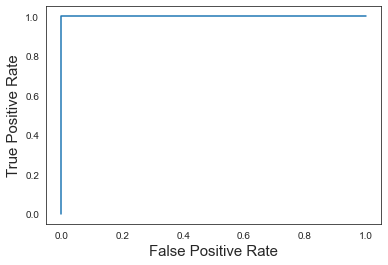


# of total training samples in the graph: 408


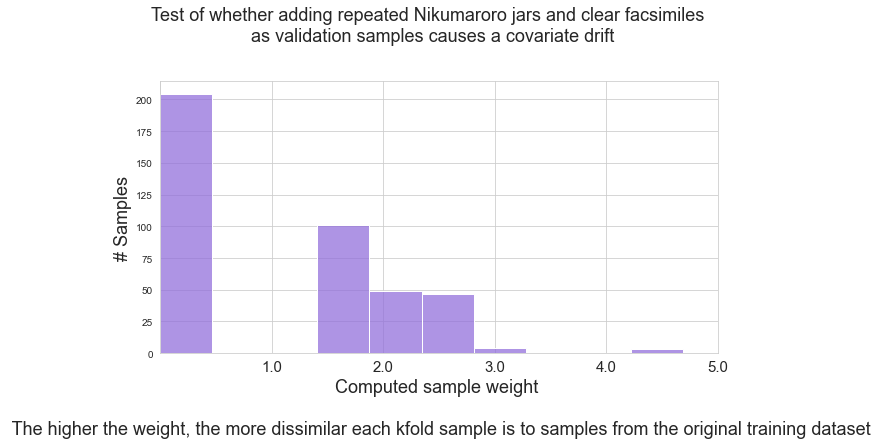

In [37]:
train = dataset_ml.drop(['ID'], axis=1)
# The artifact data are given as lists
validation = [artifact_features+artifact_identity]
facsimile = facsimile_features+facsimile_identity
set_validation(validation, 107, True,'mix')
covariate_drift(validation,'Test of whether adding repeated Nikumaroro jars and clear facsimiles \n ' + 
                'as validation samples causes a covariate drift',20)

### Analysis of covariate drift: Effect of Nikumaroro jar and clear facsimile
The exhibits returned by the first test show unambiguously that the jar from Nikumaroro and the clear facsimile cause covariate drift in the analysis. The distribution plot shows two distinct groups, representing a clean division of samples between the U.K. database and the jars. The spread of the jar group is rather wide, indicating that some examples from the U.K. database are more similar to the jars than others.

### Analysis of second test of covariate drift: Effect of the training data on itself
Our last test is a control experiment. We want to know whether the training data itself contains some inherent covariate drift of its own. Does the training data from the U.K. database show internal consistency with itself? This is also a good way to check for how a dataset potentially without covariate drift should appear.

This last test shows that the U.K. database is not perfectly consistent. Rather than the jagged bell curve that would appear in a highly normal distribution, our plot shows a bimodal distribution. This is most likely the result of two large categories of data within the U.K. database. Window and Non-window are the most likely separations that this plot is showing, with the smaller peaks toward the right possibly representing the less populated categories of tableware, headlamps, and containers.

The overall picture drawn by this plot, however, is of a database without covariate drift.

# training rows: 214
# validation rows: 214
Combined validation and train - feature variables (rows, columns): (428, 9)
Combined validation and train - target variable (rows, columns): (428,)
Confusion matrix for combined training + validation predictions:
[[  9 205]
 [211   3]]
# training rows after stratified kfold: 407
# validation rows after stratified kfold: 21
Case mix for X_train after Kfold:
Counter({'from training': 204, 'from validation': 203})
ROC-Area Under Curve score for train and validation distributions: 0.007184033540047148


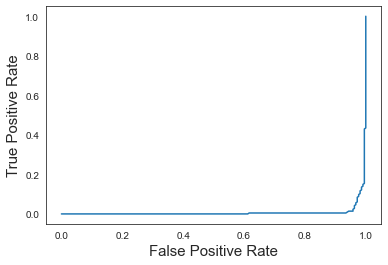


# of total training samples in the graph: 407


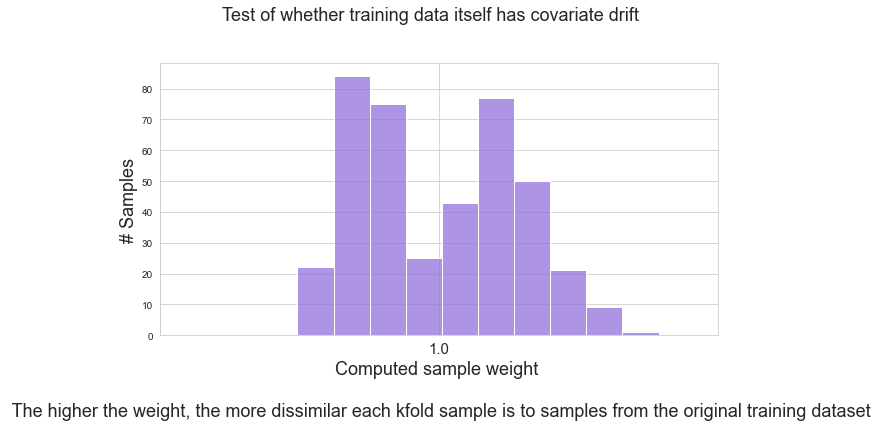

In [38]:
train = dataset_ml.drop(['ID'], axis=1)
## Test of whether the training dataset itself has covariate drift
validation2 = train.copy()
comparison=covariate_drift(validation2,'Test of whether training data itself has covariate drift',20)

### Treating Covariate Drift
Many articles offer treatment options for addressing covariate drift. The only true measure of the success of treatment is the success of the machine learning models. Was a given model able to identify the jars correctly? We have already seen that, using SMOTE oversampling, we were able to identify the clear facsimile correctly, despite the covariate drift that was in the validation samples. Would additional techniques be able to identify the Nikumaroro jar as a container? 

Albert Um, in an article for Medium, https://albertum.medium.com/covariate-shift-in-machine-learning-adf8d0077f79, has written a program that uses logistic regression to calculate weighting factors that may be used to weight the model to favor those training examples that are most like the validation set. The weights may then be used in the model to fit the original training examples and then predictions can be made on the jars that would presumably be more accurate than they would have been without the weights.

### Setting up the data
Here is how it works:
The setup of the training dataset is identical to Shikhar Gupta's algorithm, albeit with slightly different syntax. We take the original dataframe of the U.K. database and drop the 'ID' and 'GlassType' variables, since these will not be needed in the analysis. Then we add our 'is_train' column to the data, populating it with '1', indicating that these observations came from training. We convert the training dataset to an array and split it vertically into features (X_train) and the target (Y_train), which is comprised solely of the is_train variable.

We then build our validation dataset exactly as we did previously, appending multiple copies to itself until we have a dataframe that is the same size as the training dataset. Then we add the is_train column to the validation dataset, populating it with a value of '0'. We then convert the validation dataset to an array and split that array vertically into features (X_validation) and the target (Y_validation), which is comprised solely of the is_train variable.

In [39]:
# Recover original training dataframe
train = dataset_ml.drop(['ID','GlassType'], axis=1)
# Assign new target
train['is_train'] = 1

# Convert training dataframe to an array
array = train.values

# Split training into X and Y
X_train = array[:,0:9]
Y_train = array[:,9]

# Re-create validation consisting of artifacts
validation = [artifact_features + artifact_identity]
facsimile = facsimile_features + facsimile_identity

# Enlarge the validation set by appending copies
set_validation(validation, 106, True, 'mix')

# Convert the list to a dataframe
names=['Ref_ix','Na',  'Mg',   'Al', 'Si',  'K',  'Ca',  'Ba',  'Fe', 'GlassType']
validation=pd.DataFrame(validation, columns=names)
    
print('# training rows:',len(train))
print('# validation rows:',len(validation))

# Add the column to identify whether a row comes from train or not
validation['is_train'] = 0

# Convert validation dataframe to an array
val_array=validation.values
# Split validation into X and Y
X_validation = val_array[:,0:9]
Y_validation = val_array[:,10]

# training rows: 214
# validation rows: 213


### Creating the weights
Now Mr. Um takes the two X and two Y arrays and stacks them using np.vstack and np.hstack. He creates two new arrays, named X_cov and y_cov, which combine, as previously, the training features and validation features (X_cov), and then, in a separate array, the training target and the validation target (y_cov). These functions create arrays in the format that logistic regression will be able to use in fitting the model. 

Next, he fits the stacked arrays, X_cov and y_cov to a logistic regression model. This model uses both training (U.K. database) and validation (the jars) to create a new model that encompasses our "drifted" examples. With the new model in hand, he uses the decision_function of logistic regression to calculate confidence scores on the original training sample.

To reduce what Mr. Um calls "outrageous weight assignments," he uses a cutoff value of 3 (or -3), which he applies conditionally to the array of confidence scores. All scores less than -3 are assigned a -3. All scores greater than 3 are assigned a 3. Mr. Um then exponentiates (raises Euler's number, 2.71828, to the power of each weight), using the np.exp function.

We then have an array of weights that correspond with each row of the original training sample.

In [40]:
# Albert Um
# Fitting Logistic Regression to obtain weights similar to test

# vertical stack feature matrix
X_cov = np.vstack([X_train, X_validation])

# horizontal stack label array
y_cov = np.hstack([Y_train, Y_validation])

# Instantiate a binary classifier for confidence scores
weights_logreg = LogisticRegression(max_iter=2000000)
weights_logreg.fit(X_cov, y_cov)

# Calculate the weights for X_train, not to X_train + X_validation,
# but based on the fit of the covariate stacks, which include training + validation
# This brings the count to the original 214.
# confidence scores
conf_scores = weights_logreg.decision_function(X_train)
#print(conf_scores)
# Clipping (C = Cutoff, originally set at 3)
C = 3
conditions = [
  conf_scores < -C,
  conf_scores > C
]

choices = [
  -C,
  C
]
conf_scores = np.select(conditions, choices, conf_scores)
# exponentiate the confidence scores
weights = np.exp(conf_scores)
weights = weights.flatten()
print('# of weights:',len(weights))

# of weights: 214


### Fitting the model with the weights to the training sample
We can now bring back our original U.K. database as an array. Split the array into features (x) and target (y), using the original target variable, GlassType.

We then create stratified Kfolds of X_train (training features), X_validation (validation features), Y_train (training target), and Y_validation (validation target). We then fit our favorite model, Random Forests, to the training features and training target, using the sample weights we derived from the earlier fitting of the logistic regression model to the data that included both the U.K. dataset and the jars.

In [41]:
# Bring back the original dataset with the original target column: GlassType
# so that we can apply the weights above to test their predictive ability
array = dataset_ml.values
x = array[:,1:10]

y = array[:,10]

#print('length X_train:',len(X_train))
#print('length weights:',len(weights))

# We use a folded split to fit the model on the training data only, 
# thus avoiding data leakage in the fitting of the model.
# The validation datasets must be naive to the training datasets to prevent data leakage.

# The splits=4 allows the validation set to be about 25% of the size of the training set.
skf=SKF(n_splits=4, shuffle=True, random_state=100)
for fold, (train_idx, validation_idx) in enumerate(skf.split(x,y)):
        X_train, X_validation = x[train_idx], x[validation_idx] 
        Y_train, Y_validation = y[train_idx], y[validation_idx]

#print(len(X_train),len(X_validation),len(Y_train),len(Y_validation))
#print(Y_train)
# The idea is to weight more heavily those training examples that are 
# more similar to the artifacts
# Fit a new model with the logistic regression's custom weights
model = RandomForestClassifier(n_jobs=-1,max_depth=5)
model.fit(X_train, Y_train, sample_weight = weights[train_idx]);

### Assessing the skill of the weighted model
Now it is time to see how this new model with weights performs against covariate drift. This next step is rather simple. We can use the model fitted in the prior step to make predictions on the validation features (jars), then print a confusion matrix and a classification report to assess the results.

In [42]:
yhat = model.predict(X_validation)
print('Random Forest with sample_weight')
print(confusion_matrix(Y_validation, yhat))
print(classification_report(Y_validation, yhat, zero_division=1))

Random Forest with sample_weight
[[13  4  0  0  0  0]
 [ 5 14  0  0  0  0]
 [ 3  1  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

         1.0       0.62      0.76      0.68        17
         2.0       0.61      0.74      0.67        19
         3.0       1.00      0.00      0.00         4
         5.0       1.00      0.25      0.40         4
         6.0       1.00      0.50      0.67         2
         7.0       1.00      1.00      1.00         7

    accuracy                           0.68        53
   macro avg       0.87      0.54      0.57        53
weighted avg       0.74      0.68      0.65        53



Unfortunately, our model performs a good deal worse than both our SMOTE and non-SMOTE models used earlier. On the Nikumaroro jar, it computes a minimal probability that the Nikumaroro jar is a container. On the clear facsimile, the results are very similar.

In [43]:
yhat = model.predict([artifact_features])
yhat2 = model.predict([facsimile_features])
yhat_probability = model.predict_proba([artifact_features])
yhat2_probability = model.predict_proba([facsimile_features])
the_report()

Nikumaroro jar prediction: Window Float
The artifact has a probability of:
49% to be a Window Float
23% to be a Window Non-Float
18% to be a Headlamp
10% to be a Vehicle Float
0% to be a Tableware
0% to be a Container

clear facsimile prediction: Window Non-Float
The clear facsimile has a probability of:
33% to be a Window Non-Float
18% to be a Tableware
18% to be a Window Float
15% to be a Headlamp
11% to be a Container
4% to be a Vehicle Float


Using the same Random Forests model without weights as a control, we find that the skill of this model is about the same as that of the model with weights, and the clear facsimile and Nikumaroro jar are still assigned a very low probability as containers.

In [44]:
modelnoWeight = RandomForestClassifier(n_jobs=-1,max_depth=5)
modelnoWeight.fit(X_train, Y_train)
yhat = modelnoWeight.predict(X_validation)

print('Random Forest without sample_weight')
print(confusion_matrix(Y_validation,yhat))
print(classification_report(Y_validation, yhat, zero_division=1))

Random Forest without sample_weight
[[12  5  0  0  0  0]
 [ 5 13  0  0  0  1]
 [ 2  2  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

         1.0       0.63      0.71      0.67        17
         2.0       0.54      0.68      0.60        19
         3.0       1.00      0.00      0.00         4
         5.0       1.00      0.25      0.40         4
         6.0       1.00      0.50      0.67         2
         7.0       0.88      1.00      0.93         7

    accuracy                           0.64        53
   macro avg       0.84      0.52      0.55        53
weighted avg       0.70      0.64      0.61        53



In [45]:
yhat = modelnoWeight.predict([artifact_features])
yhat2 = modelnoWeight.predict([facsimile_features])
yhat_probability = modelnoWeight.predict_proba([artifact_features])
yhat2_probability = modelnoWeight.predict_proba([facsimile_features])
the_report()

Nikumaroro jar prediction: Window Float
The artifact has a probability of:
49% to be a Window Float
25% to be a Window Non-Float
18% to be a Headlamp
8% to be a Vehicle Float
0% to be a Container
0% to be a Tableware

clear facsimile prediction: Window Non-Float
The clear facsimile has a probability of:
35% to be a Window Non-Float
23% to be a Headlamp
16% to be a Window Float
15% to be a Tableware
7% to be a Container
5% to be a Vehicle Float


### Why Did the Weighting Fail to Improve the Model?
On an intuitive level, the low skill of this weighted model can be understood by looking back at the scatter plot we used to demonstrate SMOTE. Let's recreate this scatter plot now.

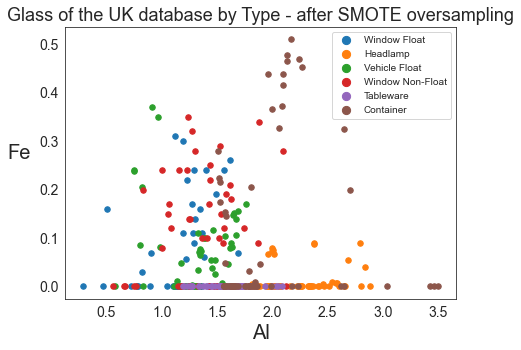

In [46]:
sns.set_style("white")
smotegraph(' - after SMOTE oversampling','sm')

For the weighting model to be successful, two things need to happen. 

First, samples in the original training set (U.K. database) that have somewhat similar features to the validation set (jars) must exist. Notice the upper left quadrant of the SMOTE graph above. There are only a few training examples in that region. If, for example, our jars have features that place them in the upper left corner of the graph, there will be no training examples there to weight in favor of the validation examples. 

Second, at least a few of the samples in the original training set (U.K. database) that share similar features to the validation set (jars) must actually **BE** jars. If they are not jars, then weighting these examples will only cause the model to reinforce and amplify its misinterpretations. 

Judging by the number of proposed treatment options, it would seem that there is no single magic bullet to the problem of covariate drift. The best approach is to experiment, with the realization that some validation samples may have drifted beyond the reach of rescue by a skillful model. In essence, the Nikumaroro jar might be regarded not as an example of covariate drift, but rather as a paradigm shift, a combination of features too unique to be generalizable to the world of glass types available in 1987.

The most basic treatment option, and the preferred one, for covariate drift is to find new data examples to add to the training set that will diversify it and make it more adaptable to training it for unanticipated validation examples.

## Conclusions
Our task, then, would seem to be to supplement the 1987 U.K. database with chemical profiles of jars from the early twentieth century that are similar to the Nikumaroro jar. 

But could these examples be found? Those of us who analyzed the Nikumaroro jar have searched for more than ten years and have not so far found any siblings that match that jar's chemical profile. The search, however, continues.

I derive two lessons from this machine learning project:
1. Machine learning, at least of the type developed here, is not without failure or flaw. It can sometimes fail spectacularly.

2. Flawlessness, however, is neither very interesting nor very attainable, and in any case, it may not even be necessary. We can learn more sometimes by a model's failure to learn than by its success.


We have learned that our machine learning model can correctly characterize the clear facsimile, a jar of the same size and shape as the Nikumaroro jar, and possibly from the same era. The model cannot correctly characterize the semi-opaque Nikumaroro jar. One might suppose that this jar has a rare and original recipe that, in the absence of any information other than the data nourishing the model, is not readily identifiable as to the glass type, even with the powerful machine learning tools, such as random forests, available to us in 2022. While this may not be confirmative as to whether or not the jar was owned and brought to Nikumaroro Island by Amelia Earhart, this fact is further confirmation of its originality and rarity, perhaps even in its own time.

## Notes
[1] <i>Wallenberger, Frederick T. and Bingham, Paul A., ed. Fiberglass and Glass Technology: Energy-Friendly Compositions and Applications. New York: Springer Science and Business Media, 2010, p. 323.</i><br>
[2] <i>Caddy, Brian, ed.  Forensic Examination of Glass and Paint.  London: Taylor & Francis, 2001, p. 61.</i><br>
[3] <i>Kaur, Gurbinder. Bioactive Glasses: Potential Biomaterials for Future Therapy. Germany: Springer International Publishing, 2017, p. 107.</i>

## Acknowledgements
I owe much of what I have learned to date in machine learning to Dr. Jason Brownlee:
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

I owe a debt of gratitude to reviewers from The Alan Turing Institute. Jennifer Ding, Research Application Manager and Eirini Zormpa, Community Manager of Open Collaboration, kindly offered numerous suggestions for clarifying both the code and the writing of this paper.

Thank you to all of the members of the Turing Data Stories Wednesday Meeting Group, who also offered many insights, camaraderie and support through many months of the process of creating new and interesting Turing Data Stories, and the work continues.

Thank you to Ric Gillespie of The International Group for Historic Aircraft Recovery for graciously allowing the sharing of this research with The Alan Turing Institute.

Thank you to Ian W. Evett and Ernest J. Spiehler, for making the data from their 1987 glass study available for students and experienced data scientists alike to use.

Thank you to my co-authors of the paper "A Freckle In Time," which was written from 2010-2013: Greg George, Senior Staff Chemist at Persedo Spirits, Bill Lockhart, former assistant professor of sociology at New Mexico State University at Alamogordo, and Thomas Fulling King, former director of the United States Advisory Council on Historic Preservation.